In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *
import math
from sklearn.metrics import mean_squared_error as MSE
import xarray as xr

import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
import rasterio.plot as rplt
from rasterio.features import rasterize
from rasterstats import zonal_stats
from hydroeval import *
import seaborn as sns
import pwlf
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import statsmodels.api as stm
import pickle

def cm2inch(*tupl):### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
import warnings
warnings.filterwarnings("ignore")

years = [2016, 2017, 2018]

In [112]:
# (141+239+150)/(330+603+301)

In [113]:
# len(df_agg),len(df_agg.gpr[np.isnan(df_agg.gpr)].values)

In [142]:
# ipr=D[(D.id==0)&(D.distance>300.)&(D.distance<900.)];dist=ipr.distance[np.isnan(ipr.gpr)].values  
# x=ipr.distance[np.logical_not(np.isnan(ipr.gpr))].values;y=ipr.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==0)&(D.distance==dist[f])]=fill[f]

# ipr=D[(D.id==1)&(D.distance<600)];dist=ipr.distance[np.isnan(ipr.gpr)].values;
# x=ipr.distance[np.logical_not(np.isnan(ipr.gpr))].values;y=ipr.gpr.values; y=y[np.logical_not(np.isnan(y))]
# fill=poly(dist);coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]

# ipr=D[(D.id==3)];dist=ipr.distance[np.isnan(ipr.gpr)].values;
# x=ipr.distance[np.logical_not(np.isnan(ipr.gpr))].values;y=ipr.gpr.values; y=y[np.logical_not(np.isnan(y))]
# fill=poly(dist)
# coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]

# D.gpr[(D.id==2)&(D.distance==0.0)]=48.3;D.gpr[(D.id==2)&(D.distance==20.0)]=27.9;D.gpr[(D.id==2)&(D.distance==40.0)]=47.5
# ct=0;depth=[191.8717,196.46,200.7749,204.8164,208.5844,212.0791,215.3003,218.2481,220.9225,223.3235,225.4511,227.3052,228.886,230.1933,231.2272]
# for i in range(460,760,20):
#     D.gpr[(D.id==4)&(D.distance==float(i))]=depth[ct]
#     ct+=1
# ct=0;depth2=[231.6889,230.8089,229.6555,228.2286,226.5284,224.5547,222.3077,219.7872,216.9933,213.9259,210.5852,
#             206.971,203.0835,198.9225,194.4881,189.7803,184.799,179.5444,174.0163,168.2149,162.14]
# for i in range(860,1280,20):
#     D.gpr[(D.id==4)&(D.distance==float(i))]=depth2[ct]
#     ct+=1

In [143]:
# np.mean(ELA),np.mean(s_ELA)
# ELA

In [144]:
# d=df_agg[(df_agg.id==4)];dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y,5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # for f in range(len(dist)):
# #     df_agg.gpr[(df_agg.id==4)&(df_agg.distance==dist[f])]=fill[f]

Mean Vel. vz 13.74 10.07
Mean Vel. ITS 9.62 7.59
3.8659275
2.8035376
Original vector layer projection:  epsg:32611
New vector layer projection (PROJ4):  +init=epsg:2955 +type=crs


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
Original vector layer projection:  +init=epsg:2955 +type=crs
New vector layer projection (PROJ4):  +init=epsg:2955 +type=crs


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
Original vector layer projection:  +init=epsg:2955 +type=crs
New vector layer projection (PROJ4):  +init=epsg:32611 +type=crs


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
OBSFG work start
OBSFG work end
Mean Vel. vz 12.97 9.58
Mean Vel. ITS 10.29 8.1
3.747265
3.2122195
Original vector layer projection:  e

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


OBSFG work start
OBSFG work end
OBSFG work start
OBSFG work end


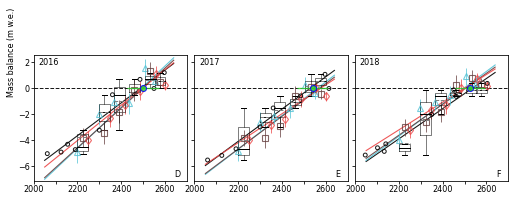

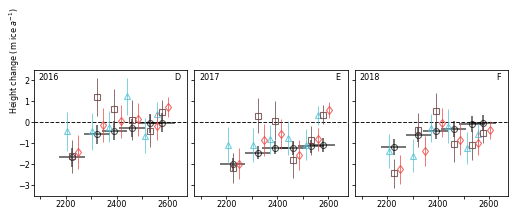

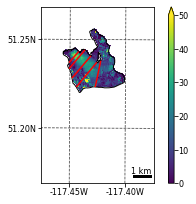

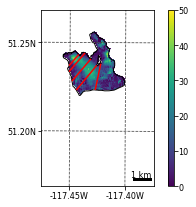

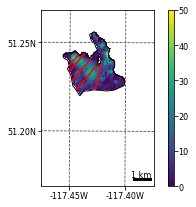

In [2]:
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8};plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'; pylab.rcParams['ytick.major.pad']='1.'

fig1, ax1 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(cm2inch(18, 5.))) #obs. and flux gate SMB boxplot/errorbar plot
fig2, ax2 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(cm2inch(18, 5.))) ##mass conservation plot
count = 0
mfc='none'; mew=1.1; elw=0.9

for yr in range(len(years)):
    # season
    balance = 'Ba'  # Bw or Ba (winter or annual)
    # rho_snow = 445. # 470 kg m-3 geodetic or 457 glaciological, or...take given years obs. value
    year = years[yr]
    I = np.abs(year - 2016) # for selecting raster inputs
    vcorr=False ## is velocity corrected by off ice bias and stake bias?

    gl = 2 # number to select glacier
    Glacier = ['Kokanee', 'Conrad', 'Illecillewaet']
    glacier = ['kokanee', 'conrad', 'illecillewaet']
#     d = 20. #20.  #distance (m) between flux gate points
    Dint = 0.85 #depth integrated velocity ratio, 1.0= all sliding
    sVSTAKE=1.10; sVOFFice=1.1; sVCoreg=2.0; sVRAND=1.5
    sVsys=np.sqrt((sVOFFice**2)+(sVCoreg)**2)
    sVZ=np.sqrt((sVsys**2)+((sVRAND)**2))
    sHopt = 0.078 ## ME:10.3 m,  MAE:0.223 (percent ratio)

    fl_path = '/home/pelto/Desktop/ice_flux/' + Glacier[gl] + '/'
    gpr_path = '/home/pelto/GIS/GPR/ComparisonData/'
    path = '/home/pelto/Desktop/lidar_cbt_analysis/' + glacier[gl] + '/'

    VDIR = 'individual'  # 'average' or 'individual'
    ITS_LIVE = False
    firn = False
    fit= 'lin'  # lin or 'pw'
    
    if VDIR == 'individual':
    #     vf_list = ['img1_20160912__img1_20170917_vmap_5m_35px_spm2/', 'img1_20160912__img1_20170917_vmap_5m_35px_spm2/',
    #            'img1_20170521__img1_20180426_vmap_5m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/

#         vf_list = ['img1_20160912__img1_20170521_vmap_5m_35px_spm2/', 'img1_20160912__img1_20170521_vmap_5m_35px_spm2/',
#                'img1_20180426__img2_20181016_vmap_5m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/
        vf_list = ['illecillewaet_2016_all25m_vx.tif','illecillewaet_2017_all25m_vx.tif','illecillewaet_2018_all25m_vx.tif']
    #     vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/spm2/' + vf_list[I]
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/' 
#         VX = vdir+ vf_list[I][:-1] + '-F_vx.tif' 
#         VY = vdir+ vf_list[I][:-1] + '-F_vy.tif' 
        VX = vdir+ vf_list[I]
        VY = vdir+ vf_list[I][:-7] + '_vy.tif' 
        ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'
    else:
#         vf_list = ['illec_all_spm2_5m', 'illec_all_spm2_5m', 'illec_all_spm2_5m']
#         vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/spm2/'  
#         VX = vdir+ 'vx/' +vf_list[I] + '_vx.tif' 
#         VY = vdir+ 'vy/' +vf_list[I] + '_vy.tif'
       
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'  
        VX = vdir + vf + 'blur1_25m_vx_neg.tif' #'vx_best_neg_5m.tif'
        VY = vdir + vf + 'blur1_25m_vy.tif'
#         VM = vdir + vf + 'vm_5m.tif'
        ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'
    
    topo = path + '160912_illecillewaet_dem1_clip_master.tif'

    farinotti = gpr_path + glacier[gl] +'/Illec_Geike_combi.tif' #''RGI60-02/RGI60-02.03688_thickness.tif' #'RGI60-02.00147_thickness_srtm_corr.tif' #'RGI60-02/RGI60-02.00147'

    dhW_list = ['illecillewaet_2016_winter_dh_dt.tif', 'illecillewaet_2017_winter_dh_dt_dat1_clip.tif', 'illecillewaet_2018_winter_dh_dt_2.tif']
    dhA_list = ['illecillewaet_2016_2015_dh_dt_clip_filled_1617.tif', 'illecillewaet_2017_2016_dh_dt.tif','illecillewaet_2018_2017_dh_dt_zmax1800-1m.tif']
    if balance == 'Bw':
        dh_r = path+ dhW_list[I]   #winter height change TIFF
    else:
        dh_r = path+  dhA_list[I] #Annual height change TIFF

    pts_file = fl_path + 'gis/Illec_flux_gates_5_pts_25m.shp'  ##must be WGS84 currently
    gates = fl_path+'Illec_flux_gates_5.shp'
    shpf = '/home/pelto/GIS/outlines/Illec2016.shp'   #GLIMS_BC/glims_all/all_glaciers_2016.shp' 

    if year==2016 or year==2017:
        bins=fl_path+'illec_flux_bins_16_5.shp'
    else:
        bins=fl_path+'illec_flux_bins_17_5.shp'

    obs = pd.read_csv(fl_path+ 'Illecillewaet_bdot.csv')
    rho = pd.read_csv(fl_path + 'RHO.csv')#'illec_rho_5.csv')  ## rho

    # open GeoTIFF as array
    vx = salem.open_xr_dataset(VX);vy = salem.open_xr_dataset(VY);vx = vx.to_array(name='vx');vy = vy.to_array(name='vy')
    msk = salem.open_xr_dataset(fl_path + 'illec_all_glaciers_2016.tif') 
    extent=salem.open_xr_dataset(path +'illecillewaet_2014_extent_5m.tif') ## 1.0 for glacier nan for off (-9999)
    
    # msk = msk.to_array(name='msk')
    gpr = salem.open_xr_dataset(fl_path + 'gpr_50_100m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
    farin = salem.open_xr_dataset(farinotti)

    H_opt = salem.open_xr_dataset(fl_path+'Illecillewaet_251sw_MAE_optimized.tif')#+'Illecillewaet101sw_MAE_optimized.tif') 
 
    gates = salem.read_shapefile(gates)
    H_opt_reproj = vx.salem.transform(H_opt); H_opt = H_opt_reproj.to_array(name='H_opt')
    msk_reproj = vx.salem.transform(msk);msk = msk_reproj.to_array(name='msk')
    extent_reproj=vx.salem.transform(extent); extent = extent_reproj.to_array(name='extent')
    gpr_reproj = vx.salem.transform(gpr); gpr = gpr_reproj.to_array(name='gpr')
    ITS = salem.open_xr_dataset(ITS); ITS_reproj = vx.salem.transform(ITS);ITS = ITS_reproj.to_array(name='ITS')

    farin_reproj= vx.salem.transform(farin)
    farin = farin_reproj.to_array(name='farin')
    srtm_corr = fl_path + 'illecillewaet_SRTM_diff_30m.tif'
    srtm_corr = salem.open_xr_dataset(srtm_corr);srtm_corr = vx.salem.transform(srtm_corr)
    srtm_corr = srtm_corr.to_array(name='srtm_corr')
    srtm_corr.data[srtm_corr.data>10.0] = 0.0  ##remove positive anomalous values
    srtm_corr.data[srtm_corr.data<-50.0] = 0.0 ##remove negative anomalous values
    farin_corr = farin + srtm_corr; farin_corr= farin_corr.rename('farin_corr')
    gpr.data[gpr.data<0.5] = np.nan ## ensure no data read as nan

    vx.data[vx.data>0.01]= vx.data[vx.data>0.01]*-1.0 #=np.nan  ## vx for illec
    vz = vy.copy(); vz.data = np.sqrt(vx.data**2 + vz.data**2 )
    vz.data[extent.data!=1.0] = np.nan;vx.data[extent.data!=1.0] = np.nan;vy.data[extent.data!=1.0] = np.nan 
    vz=xr.DataArray(vz.data, coords=vz.coords, name='vz')
    np.savetxt(fl_path+(str(year)+'_vz.csv'), vz[0].data, delimiter=',')
    ITS.data[extent.data!=1.0] = np.nan
    VZ_off_ice = vz.copy()
    VZ_off_ice.data[msk.data==1.0] = np.nan
    # VZ_off_ice[VZ_off_ice==0.0] = np.nan  ## vz[extent.data<1.0] = np.nan
    
    with open(fl_path+str(year)+'_vz.pkl', 'wb') as f:
        pickle.dump(vz[0].data, f)
    with open(fl_path+str(year)+'_ITS.pkl', 'wb') as f:
        pickle.dump(ITS[0].data, f)
    
    DIFF = vz - ITS
    dem = salem.open_xr_dataset(topo)
    dem_reproj = vx.salem.transform(dem)
    dem = dem_reproj.to_array(name='dem')
    dem.data[dem.data<1] = np.nan

    #     # map extent
    # grid = mercator_grid(center_ll=(-117.43, 51.238), extent=(4500, 4500)) ##zoomed out view
    # 487892.000 5509738.000 491232.000 5512358.000
    fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(cm2inch(18, 8.25))) 
    grid = vx.salem.grid  ##full view
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(vz) #, label='m')
    sm.set_vmax(val=50.)
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    off_ice_V = np.nanmean(VZ_off_ice)
    print('Mean Vel. vz', round(np.nanmean(vz),2), round(np.nanstd(vz),2))
    print('Mean Vel. ITS', round(np.nanmean(ITS),2), round(np.nanstd(ITS),2))
    print(off_ice_V)
    print(np.nanstd(VZ_off_ice))
    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
    sm.visualize()
    #     plt.savefig(fl_path+ 'products/'+ glacier[gl] +'_thickness_gates.png', dpi=300)
    #     plt.show()

    ## Functions for calculating zonal statistics over each flux gate bin
    # https://community.esri.com/groups/python-snippets/blog/2019/05/07/calculating-zonal-statistics-with-python-rasterstats
    # For loading shapefiles into geopandas dataframe

    def enum_items(source):
        print("\n")
        for ele in enumerate(source): 
            print(ele)

    def list_columns(df):
        field_list = list(df)
#         enum_items(field_list)
        return field_list

    def loadshp_as_gpd(shp):
        data_shp = gpd.read_file(shp)
        return data_shp

    # For loading feature classes into geopandas dataframe
    def loadfc_as_gpd(fgdb):
        layers = fiona.listlayers(fgdb)
        enum_items(layers)
        index = int(input("Which index to load? "))
        fcgpd = gpd.read_file(fgdb,layer=layers[index])
        return fcgpd

    # For re-projecting input vector layer to raster projection
    def reproject(fcgpd, raster):
        proj = raster.crs.to_proj4()
        print("Original vector layer projection: ", fcgpd.crs)
        reproj = fcgpd.to_crs(proj)
        print("New vector layer projection (PROJ4): ", reproj.crs)
    #     fig, ax = plt.subplots(figsize=(15, 15))
    #     rplt.show(raster, ax=ax)
    #     reproj.plot(ax=ax, facecolor='none', edgecolor='red')
    #     fig.show()
        return reproj

    def dissolve_gpd(df):
        field_list = list_columns(df)
        index = 1 #int(input("Dissolve by which field (index)? "))
        dgpd = df.dissolve(by=field_list[index])
        return dgpd

    # For selecting which raster statistics to calculate
    def stats_select():
        stats_list = stats_list = ['min', 'max', 'mean', 'count', 
                  'sum', 'std', 'median', 'majority', 
                  'minority', 'unique', 'range']
        enum_items(stats_list)
    #     indices = input("Enter raster statistics selections separated by space: ")
        indices='2 3 5 6'
        stats  = list(indices.split())
        out_stats = list()
        for i in stats:
            out_stats.append(stats_list[int(i)])
        return out_stats

    def get_zonal_stats(vector, raster, stats):
        # Run zonal statistics, store result in geopandas dataframe
        result = zonal_stats(vector, raster, stats=stats, geojson_out=True)
        geostats = gpd.GeoDataFrame.from_features(result)
        return geostats

    df = salem.read_shapefile(pts_file); df_file = loadshp_as_gpd(pts_file); df_file.crs

    coords = np.array([p.xy for p in df.geometry]).squeeze()
    df['lon'] = coords[:, 0]; df['lat'] = coords[:, 1]

    # ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);
    xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
    df['x'] = xx; df['y'] = yy

    vns = ['vx','vy','vz','ITS','gpr','H_opt','dem','farin_corr',]

    M = xr.merge([vx,vy,vz,ITS,gpr,H_opt,dem,farin_corr])

    for vn in vns:
        df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

    df_agg = df[['id', 'len', 'distance', 'angle', 'geometry', 'lon', 'lat']].copy()
    ii, jj = grid.transform(df['lon'], df['lat'], crs=salem.wgs84, nearest=True)
    df_agg['i'] = ii; df_agg['j'] = jj
    # # We trick by creating an index of similar i's and j's
    df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii.astype(int), jj.astype(int))]
    df_agg = df_agg.groupby('ij').mean()
    # Select
    for vn in vns:
        df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i.astype(int)), y=('z', df_agg.j.astype(int)))  

    D = df_agg[['id', 'len', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy', 'vz', 'ITS','gpr', 'H_opt', 'dem', 'farin_corr']].copy()
    #     D = D[D.id!='0122_0084'] # removing a magical duplicate point
    #     D.reset_index(inplace=True,drop=True);
    #         print('starting vel work')
#     for i in range(len(D)):
#         if D.vx[i]>20:
#             D.vx[i]=D.vx[i]/-2
#         elif D.vx[i] > 0.0 and D.vx[i] < 20:
#             D.vx[i]=D.vx[i]/-1
#         elif D.distance[i]==0.0 or D.distance[i]==D.len[i]:
#             D.vx[i] = 0.0;D.vy[i] = 0.0
#     print('ending vel work')        
    #D['vz'] = #np.sqrt(D.vx**2 + D.vy**2 )  # np.sqrt(U**2 + V**2 )
    D['vzdir'] = np.arcsin(D.vx/D.vz) *180/math.pi #degrees from north
    
    ## fill missing IPR data
    #last and first points in each line are zero depth (except gates 2 and 4 start)
#     D.distance[(D.id==0)&(D.distance==257.5)]=265
    D.gpr[(D.distance==0.0)&(D.gpr==np.nan)]=0.0;D.gpr[(D.distance==D.len)]=0.0;
    D.gpr[(D.id==2)&(D.distance==0.0)]=np.nan;
    
    D.H_opt[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.H_opt[(D.distance==D.len)]=0.0;
    D.farin_corr[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.farin_corr[(D.distance==D.len)]=0.0;
    
    ipr=D[(D.id==0)&(D.distance>300.)&(D.distance<900.)];dist=ipr.distance[np.isnan(ipr.gpr)].values  
    x=ipr.distance[np.logical_not(np.isnan(ipr.gpr))].values;y=ipr.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==0)&(D.distance==dist[f])]=fill[f]

    ipr=D[(D.id==1)&(D.distance<600)];dist=ipr.distance[np.isnan(ipr.gpr)].values;
    x=ipr.distance[np.logical_not(np.isnan(ipr.gpr))].values;y=ipr.gpr.values; y=y[np.logical_not(np.isnan(y))]
    fill=poly(dist);coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]

    ipr=D[(D.id==3)];dist=ipr.distance[np.isnan(ipr.gpr)].values;
    x=ipr.distance[np.logical_not(np.isnan(ipr.gpr))].values;y=ipr.gpr.values; y=y[np.logical_not(np.isnan(y))]
    fill=poly(dist)
    coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]

    D.gpr[(D.id==2)&(D.distance==0.0)]=48.3;D.gpr[(D.id==2)&(D.distance==20.0)]=27.9;D.gpr[(D.id==2)&(D.distance==40.0)]=47.5
    ct=0;depth=[191.8717,196.46,200.7749,204.8164,208.5844,212.0791,215.3003,218.2481,220.9225,223.3235,225.4511,227.3052,228.886,230.1933,231.2272]
    for i in range(460,760,20):
        D.gpr[(D.id==4)&(D.distance==float(i))]=depth[ct]
        ct+=1
    ct=0;depth2=[231.6889,230.8089,229.6555,228.2286,226.5284,224.5547,222.3077,219.7872,216.9933,213.9259,210.5852,
                206.971,203.0835,198.9225,194.4881,189.7803,184.799,179.5444,174.0163,168.2149,162.14]
    for i in range(860,1280,20):
        D.gpr[(D.id==4)&(D.distance==float(i))]=depth2[ct]
        ct+=1
        
        
    if year==2018: 
        with open(fl_path + glacier[2]+'_df_agg.pkl', 'wb') as f:
            pickle.dump(D, f)    
    #multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
    if ITS_LIVE == True:
        D['vfg'] = D.ITS
    else:
        D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.))) #velocity normal to gate per slice    
    
    for i in range(len((D))):   #D.id.nunique()):
        if np.isnan(D.vfg[i])==True:
            G=D.id[i]
            V=np.nanmean(D.vfg[D.id==G]) 
            D.vfg[i]=V
    with open(fl_path + str(year)+'_Dvfg.pkl', 'wb') as f:
        pickle.dump(D.vfg.values, f)      
    dem_r = topo;vel_r = VX ;shp = loadshp_as_gpd(bins)
    rasters = [dh_r, dem_r, vel_r]
    names = ['dh','dem','vx']
    for i in range(len(rasters)):
        raster = rasters[i]
        rst = rasterio.open(raster)
        shp = reproject(shp, rst) #shp is in correct projection, trying anyway for calculation
        name = names[i]
    #     shp_vec = dissolve_gpd(shp)  ## only if more columns exist
        stats = stats_select()  #'['min', 'max', 'mean', 'count', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range']
        ZS = (get_zonal_stats(shp, raster, stats))
        ZS.drop(['geometry'], axis=1, inplace=True)
        ZS.rename(columns={"mean": name+"_mean", "median":name+"_med", "std": name+"_std", "count":name+"_count"}, inplace=True)
        ZS.sort_values(by=['bin'],ascending=True, inplace=True)
        ZS.set_index('bin', inplace=True)
        if i == 0:
            ZS_df = ZS
        else:
            ZS_df = pd.concat([ZS_df, ZS], axis=1)
            
############ correct ice thickness for thinning ##############  
    D1=D.copy(); D1.reset_index(inplace=True,drop=True);DH=[]
    for i in range(len(D1)):
        fl_id=D1.loc[i].id
        if year == 2016:
            del_h= ZS_df.loc[fl_id].dh_mean * -1##increase thickness to represent 2015 ice srfc
        elif year == 2017:
            del_h=0.0 ## no change current 2018 ice measurments map 2016 ice surface (2017 srfc+winter SD)
        elif year == 2018:
            del_h=new17.loc[fl_id].dh_mean
        DH.append(del_h)

    D['DH']=DH
    D.H_opt = D.H_opt + D.DH
    D.H_opt[D.H_opt<0.] = 0.0
    D.gpr = D.gpr + D.DH 
    D.gpr[D.gpr<0.] = 0.0
    D.farin_corr = D.farin_corr + D.DH
    D.farin_corr[D.farin_corr<0.] = 0.0
########### end correct ice thickness for thinning ##############
    
    D.sort_values(by=['distance','id'],ascending=[True,True], inplace=True) 
    
    for n in range(D.id.nunique()):

        for c in range(len(D.id[D.id==n])): #.count()-1)#range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:  ## first point in line
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c]
                G= L * D.H_opt[D.id==n][c+1]*0.5;J= L * D.farin_corr[D.id==n][c+1]*0.5 #area of triangle
                 
            elif c==1: #second point from start
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2
                G= L * D.H_opt[D.id==n][c]; J= L * D.farin_corr[D.id==n][c]
                 
            elif c==len(D.id[D.id==n])-2: #second to last point
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 
                G= L * D.H_opt[D.id==n]; J= L * D.farin_corr[D.id==n]
                
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])
                G= L * D.H_opt[D.id==n][c-1]*0.5; J= L * D.farin_corr[D.id==n][c-1]*0.5 #area of triangle
                
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))
                G=L* D.H_opt[D.id==n][c] ; J=L* D.farin_corr[D.id==n][c]  
                
            D.loc[idx,'A_Hopt']= G;D.loc[idx,'A_farin']= J; D.loc[idx,'Len_mod']= L     
    D_all=D.copy()
#     KP=[];KF=[]
#     for loop in D.index:
#         id= D[D.index==loop].id.values
#         KP.append((D[D.index==loop].vfg * Dint * d * D.H_opt[D.index==loop]).values[0])  ## ice flux per slice *0.9 to est. depth-integrated velocity
#         KF.append((D[D.index==loop].vfg * Dint * d * D.farin_corr[D.index==loop]).values[0])
#     D['Qopt'] = KP;D['Qfarin'] = KF
    D['Qopt'] = D.A_Hopt * (D.vfg) * Dint;D['Qfarin'] = D.A_farin * (D.vfg) * Dint    

    ### Uncertainties
    D['sQout'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*Dint) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQout_low'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*0.80) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQout_high'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*1.00) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQoutF'] = np.sqrt((sVZ * D.A_farin)**2 + ((D.vfg*Dint) * D.Len_mod * (sHopt*D.farin_corr))**2)

    Q_out= [0.,] #flux out per gate
    cr_area = [0.,] # cross-section area per gate
    vzdir = [0.,]; sQout= [0.,];sQout_low= [0.,];sQout_high= [0.,];vfg_all=[];gate_elev=[];v_gate_mean=[];
    Len_mod=[0.,];gate_width=[0.,]; GPR=[0.,];HF=[0.,];Hopt=[0.,]
    
    for n in range(D.id.nunique()):
        vfg_all.append(D.vfg[D.id==n])
        gate_elev.append(D.dem[D.id==n].mean())
    
    for n in range(D.id.nunique()+1):
        Q_out.append(D.Qopt[D.id==n].sum()) ;sQout_high.append(D.sQout_high[D.id==n].sum()) 
        cr_area.append(D.A_Hopt[D.id==n].sum());Hopt.append(D.H_opt[D.id==n].mean())
        vzdir.append(D.vzdir[D.id==n].mean());gate_width.append(D.len[D.id==n].max())
        sQout.append(D.sQout[D.id==n].sum());sQout_low.append(D.sQout_low[D.id==n].sum()); 
        v_gate_mean.append(D.vfg[D.id==n].mean());Len_mod.append(D.Len_mod[D.id==n].sum())
        GPR.append(D.gpr[D.id==n].mean())
    Q_in = [Q_out[1:]]
    sQin = [sQout[1:]+ [0.0]];sQin_low = [sQout_low[1:]+ [0.0]];sQin_high = [sQout_high[1:]+ [0.0]]    
    Q_in = np.squeeze(Q_in); sQin = np.squeeze(sQin);sQin_low = np.squeeze(sQin_low);sQin_high = np.squeeze(sQin_high)

    Q_outF= [0.,]; cr_areaF = [0.,]; sQoutF = [0.,]; HF = [0.,]
    for n in range(D.id.nunique()+1):
            Q_outF.append(D.Qfarin[D.id==n].sum()); cr_areaF.append(D.A_farin[D.id==n].sum()) 
            sQoutF.append(D.sQoutF[D.id==n].sum());HF.append(D.farin_corr[D.id==n].mean())

    Q_inF = [Q_outF[1:]] #flux in per bin
    Q_inF = np.squeeze(Q_inF)
    sQinF = [sQoutF[1:]+ [0.0]]; sQinF = np.squeeze(sQinF)

    FG = pd.DataFrame(list(zip(Q_out, Q_in, cr_area, sQout, sQout_low, sQout_high, sQin, sQin_low, sQin_high, Q_outF, Q_inF, sQoutF, sQinF, cr_areaF, vzdir, 
           v_gate_mean, gate_width,GPR,Hopt, HF,Len_mod)), columns=['Q_out', 'Q_in', 'cr_area', 'sQout', 'sQout_low', 'sQout_high', 'sQin', 'sQin_low', 'sQin_high','Q_outF', 'Q_inF',
            'sQoutF', 'sQinF', 'cr_areaF', 'vzdir', 'v_gate_mean','gate_width','gpr','Hopt','HF','Len_mod']) 

    FG['vfg'] = FG.Q_out / FG.cr_area #net velocity per gate
    FG['vfgF'] = FG.Q_outF / FG.cr_area
    FG['bin']=np.arange(0,len(range(D.id.nunique()+1)),1)
     
    FG['spQout'] = FG.sQout / FG.Q_out * 100. #%err on flux
    FG['spQin'] = FG.sQin / FG.Q_in * 100. #%err on flux
    FG['spQoutF'] = FG.sQoutF / FG.Q_outF * 100. #%err on flux
    FG['spQinF'] = FG.sQinF / FG.Q_inF * 100. #%err on flux

    ### import data per bin: height change, elevation, surface area, obs.SMB etc. 
    FG_df = FG.copy(); FG_df =  pd.concat([FG_df, ZS_df], axis=1)
    rho.sort_values(by='bin',ascending=True, inplace=True) # sort by bin
    rho.set_index('bin', inplace=True) # set bin as index for sorting
    FG_df =  pd.concat([FG_df, rho], axis=1)

    WR= np.array(FG_df.dem_count[1:]); WR= np.append(WR,[0])

    FG_df['Q_net'] = FG_df.Q_in - FG_df.Q_out  #net flux per gate
    FG_df['Q_netA']= FG_df.Q_net / FG_df.dem_count

    FG_df['Q_netF'] = FG_df.Q_inF - FG_df.Q_outF  #net flux per gate
    FG_df['Q_netAF']= FG_df.Q_netF / FG_df.dem_count

    FG_df['area_Qin']= WR
    FG_df['sQoptA'] = FG_df.sQout / FG_df.dem_count
    FG_df['sQoptA_low'] = FG_df.sQout_low / FG_df.dem_count;FG_df['sQoptA_high'] = FG_df.sQout_high / FG_df.dem_count    
    FG_df['sQ_inA'] = FG_df.sQin / (FG_df.area_Qin+0.001)
    FG_df['sQ_inA_low'] = FG_df.sQin_low / (FG_df.area_Qin+0.001);FG_df['sQ_inA_high'] = FG_df.sQin_high / (FG_df.area_Qin+0.001)
    FG_df['sQnetA_opt'] = np.sqrt(FG_df.sQoptA**2 + FG_df.sQ_inA**2)
    FG_df['sQnetA_opt_low'] = np.sqrt(FG_df.sQoptA_low**2 + FG_df.sQ_inA_low**2);FG_df['sQnetA_opt_high'] = np.sqrt(FG_df.sQoptA_high**2 + FG_df.sQ_inA_high**2)

    FG_df['sQoutFA'] = FG_df.sQoutF / FG_df.dem_count
    FG_df['sQ_inFA'] = FG_df.sQinF / (FG_df.area_Qin+0.001)
    FG_df['sQnetFA'] = np.sqrt(FG_df.sQoutFA**2 + FG_df.sQ_inFA**2)
    
    ##calculate height change due to mass balance for highest bins considering firn compaction
    if firn == False:
        FG_df.Vfirn = 0.0
    FG_df['b_fg_h'] = FG_df.dh_mean - FG_df.Q_netA + FG_df.Vfirn
    FG_df['b_fg_hF'] = FG_df.dh_mean - FG_df.Q_netAF + FG_df.Vfirn
    FG_df.column_depth = FG_df.column_depth * FG_df.firn_area ## adjust firn column height for firn area
     ## Ilec slope, constant: (0.025293682808396056, 400.09590745271896)
#     FG_df['rho_snow'] = (FG_df.dem_mean*(-0.02529))+400.095  #*-0.11255+743.22)
    FG_df['RHO'] = ((FG_df.column_density * FG_df.column_depth) + (910. * (FG_df.Hopt-FG_df.column_depth)))/ FG_df.Hopt
    FG_df['RHO_F'] = ((FG_df.column_density * FG_df.column_depth) + (910. * (FG_df.HF-FG_df.column_depth)))/ FG_df.HF 
    FG_df.loc[0, 'RHO'] = 910.;FG_df.loc[0, 'RHO_F'] = 910.

    if balance == 'Bw':
        FG_df['b_fg_we'] = FG_df.rho_snow/1000 * FG_df.b_fg_h
        FG_df['b_fg_weF'] = FG_df.rho_snow/1000 * FG_df.b_fg_hF
    else:
        FG_df['b_fg_we'] = FG_df['RHO']/1000. * FG_df.b_fg_h           #FG_df['rho_%s'%year]/1000. * FG_df.b_fg_h
        FG_df['b_fg_weF'] = FG_df['RHO_F']/1000. * FG_df.b_fg_hF
    ### Uncertainties
    if I==0:
        sDHdt = 0.45 #0.04 #m Bias dh from Pelto et al. 2019
    if I==1:
        sDHdt = 0.32
    elif I==2:
        sDHdt = 0.38
        
    sVfirn = 0.10; sRHO = 0.10 #0.05 # percent uncertainty in density

    FG_df['sDH_opt'] = np.sqrt(sDHdt**2 + (FG_df.sQnetA_opt)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_opt'] = np.sqrt((FG_df.sDH_opt * (FG_df['RHO']/1000.))**2+
                   (FG_df.b_fg_h * (FG_df['RHO']/1000.*sRHO))**2)

    FG_df['sDH_F'] = np.sqrt(sDHdt**2 + (FG_df.sQnetFA)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_F'] = np.sqrt((FG_df.sDH_F * (FG_df['RHO_F']/1000.))**2+
                   (FG_df.b_fg_hF * (FG_df['RHO_F']/1000.*sRHO))**2)


    D['Agpr']=np.NaN;D = D.dropna(subset=['gpr'])
    D.sort_values(by=['distance','id'],ascending=[True,True], inplace=True) 
    
    
    for i in range(len((D))):   #D.id.nunique()):
        if np.isnan(D.vz[i])==True:
            G=D.id[i]
            V=np.nanmean(D.vz[D.id==G])
            D.vz[i]=V
    
    for n in range(D.id.nunique()):
  
        for c in range(len(D.id[D.id==n])):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0: ## first point in line
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c] 
                G= L * D.gpr[D.id==n][c+1]#*0.5 #area of triangle
            elif c==1: #second point from start
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2 
                G= L * D.gpr[D.id==n][c]
            elif c==len(D.id[D.id==n])-2: #second to last point
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2
                G= L * D.gpr[D.id==n]
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= D.distance[D.id==n][c] - D.distance[D.id==n][c-1] 
                G= L * D.gpr[D.id==n][c-1]*0.5 #area of triangle
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))
                G= L * D.gpr[D.id==n][c]  
            D.loc[idx,'Agpr']= G; D.loc[idx,'Len_gpr']= L          

    #calculate flux out using GPR thicknesses
    sGPR = 0.0516 #gpr error %
    D['sInterp_gpr'] = np.nan
    for n in range(len(D.Len_gpr)):
        if D.Len_gpr[n] > 50.:
            D.sInterp_gpr[n] = D.gpr[n] * 0.10  
        else: 
            D.sInterp_gpr[n] = 0.0
    sH_gpr = np.sqrt(D.sInterp_gpr**2+ (D.gpr*sGPR)**2)

    D['Qo_gpr'] = D.Agpr * (D.vfg) * Dint#* 0.9
    D['sQo_gpr'] =  np.sqrt((sVZ * (D.gpr) * D.Len_gpr)**2 + ((D.vfg*Dint) * D.Len_gpr * (sH_gpr))**2)

    Qo_gpr = [0.,] #flux out per gate
    cr_area_gpr = [0.,] # cross-section area per gate
    vzdir_gpr = [0.,]; sQo_gpr= [0.,];Len_gpr=[0.,]
    for n in range(D.id.nunique()):
            Qo_gpr.append(D.Qo_gpr[D.id==n].sum()) ;cr_area_gpr.append(D.Agpr[D.id==n].sum())
            vzdir_gpr.append(D.vzdir[D.id==n].mean())
            sQo_gpr.append(D.sQo_gpr[D.id==n].sum())
            Len_gpr.append(D.Len_gpr[D.id==n].sum())
    Qin_gpr = [Qo_gpr[1:]+ [0.0]] #flux in per bin, add zero to end for top bin (for now)
    Qin_gpr = np.squeeze(Qin_gpr)
    sQin_gpr = [sQo_gpr[1:]+ [0.0]]
    sQin_gpr = np.squeeze(sQin_gpr)

    FG_gpr = pd.DataFrame(list(zip(Qo_gpr, Qin_gpr, cr_area_gpr, sQo_gpr,sQin_gpr,Len_gpr)), 
                          columns=['Qo_gpr', 'Qin_gpr', 'cr_area_gpr', 'sQo_gpr','sQin_gpr','Len_gpr']) 
    FG_gpr['bin'] = np.arange(0,len(range(D.id.nunique()+1)),1)#[0,1,2,3]
    # FG_gpr['vfg'] = FG_gpr.Qo_gpr / FG_gpr.cr_area_gpr #net velocity per gate
    # FG['bin']=np.arange(0,14,1)
    FG_gpr['spQo_gpr'] = FG_gpr.sQo_gpr / FG_gpr.Qo_gpr * 100. #%err on flux
    FG_gpr['spQin_gpr'] = FG_gpr.sQin_gpr / FG_gpr.Qin_gpr * 100. #%err on flux 

    FG_all = FG_df.merge(FG_gpr, how='left') #on='bin')  
    # FG_all
    FG_all['Q_net_gpr'] = FG_all.Qin_gpr - FG_all.Qo_gpr 
    FG_all['Q_netA_gpr']= FG_all.Q_net_gpr / FG_all.dem_count 
    FG_all['b_fg_h_gpr'] = FG_all.dh_mean - FG_all.Q_netA_gpr +FG_all.Vfirn #dh1516_mean

    FG_all['sQoutA_gpr'] = FG_all.sQo_gpr / FG_all.dem_count
    FG_all['sQ_inA_gpr'] = FG_all.sQin_gpr / (FG_all.area_Qin+0.001)
    FG_all['sQnetA_gpr'] = np.sqrt(FG_all.sQoutA_gpr**2 + FG_all.sQ_inA_gpr**2)    
    
    FG_all['RHO_g'] = ((FG_all.column_density * FG_all.column_depth) + (910. * (FG_all.gpr-FG_all.column_depth)))/ FG_all.gpr; 
    FG_all.loc[0, 'RHO_g'] = 910.
    if balance == 'Bw':
        FG_all['b_fg_we_gpr'] = FG_df.rho_snow/1000. * FG_all.b_fg_h_gpr
    else:
        FG_all['b_fg_we_gpr'] = FG_all['RHO_g']/1000. * FG_all.b_fg_h_gpr
    
    FG_all['sDH_gpr'] = np.sqrt(sDHdt**2 + (FG_all.sQnetA_gpr)**2 + (FG_all.Vfirn*sVfirn)**2)
    FG_all['sBwe_gpr'] = np.sqrt((FG_all.sDH_gpr * (FG_all['RHO_g']/1000.))**2+
                   (FG_all.b_fg_h_gpr * (FG_all['RHO_g']/1000.*sRHO))**2)

    ## Plot balance gradients
    n = 0
    s= 15 #markersize
    a = 0.9
    color=['b', 'lime', 'green', 'teal']

    ##all_obs
    if balance == 'Bw':
        obs = obs.dropna(subset=['Bw'])
        y_ax_obs=obs[(obs.Year==year)].Bw

    else:
        obs = obs.dropna(subset=['Ba'])
        y_ax_obs=obs[(obs.Year==year)].Ba


    x_ax_obs=obs[(obs.Year==year)].Elev

    # Drop unrealistic FG smb:
    new = FG_all.copy() 
           
    yerr = [0.0, new.sBwe_gpr , new.sBwe_opt, new.sBwe_F] #new.sBwe_gpr
    new['xerr'] = new.dem_std * 1.5 #2 std dev -- 95% of data
    xerr = new.xerr 

    x_ax_fg_gpr=new.dem_med;y_ax_fg_gpr=new.b_fg_we_gpr
    x_ax_fg_opt=new.dem_med;y_ax_fg_opt=new.b_fg_we;x_ax_fg_F=new.dem_med ;y_ax_fg_F=new.b_fg_weF
    x = [x_ax_obs, x_ax_fg_gpr, x_ax_fg_opt, x_ax_fg_F]
    y = [y_ax_obs, y_ax_fg_gpr, y_ax_fg_opt, y_ax_fg_F]
    sym = ['o', '^', 's', 'd']
    ytxt = [0.2, 0.15, 0.1, 0.05]
    letter=['D','E','F'] #['A','B','C']
    color = ['k', '#51c2d5','#663f3f','#ec4646'] #'teal', '#74c476', '#238b45']
    txt= ['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
    # Call function to create error bars 
    shift = [-25,0,25]
    for i in range(3):
        ax1[count].errorbar((x[i+1]+shift[i]), y[i+1], xerr=None, yerr=yerr[i+1], color=color[i+1],fmt=sym[i+1], 
                            mec=color[i+1],mfc=mfc, mew=mew, elinewidth=elw, zorder=2, label=txt[i+1], alpha=0.8) #elinewidth=0.7
        
    ## plot data and regression lines
#     if year == 2016 or year == 2017:
#     ax1[count].scatter(x[0],y[0],color=color[0], label=label[0], alpha=a, s=s,facecolor='', zorder=3)  ##plot obs data
    
    ############ obs data box plot ##################################################
#     if year != 2018:
    obs_data=obs[(obs.Year==year)]
    obs_data.reset_index(inplace=True)

    bin_size = 100.
    z_range = np.arange(2050., 2750., bin_size)
    # print(z_range)
    # obs_data['Elev_bin'] = np.nan

    i = 0
    # for n in range(len(obs_data.Ba)):
    Z_F = []; Zor_F= []; OB_F=[]

    for z in z_range: 
        W=0;bin_size = 100.; COU=1
        while W==0:
            OBS = [];Z = [];Zor = [];
            for n in range(len(new.dem_mean)):     
                if ((z - bin_size/2.) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (z + bin_size/2.)):
                    O = obs_data[balance][n]
                    Z.append(z);Zor.append(obs_data.Elev[n]);OBS.append(O)

            if len(OBS)<1 and bin_size<150:
                bin_size=bin_size*(1+(.2*COU))
                COU=COU+1    
            else:
                OB_F.append(np.array(OBS)); Z_F.append(np.array(Z));  Zor_F.append(np.array(Zor))
                W=1
        i += 1
        
    ######## OBS binned to flux bins ###########
    OB_FG=[];OB_FG_h=[];new.loc[0, 'dem_std'] = new.dem_std[0]*1.5 # lowest bin std too low for method (width-limited)
    for i in range(len(new.dem_med)): 
        f = new.dem_med[i]
        W=0;bin_size = new.dem_std[i]*2; COU=1
        while W==0:
            OBSFG = []; OBSFGh=[]
            for n in range(len(obs_data[balance])):
                if ((f - bin_size) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (f + bin_size)):
                    O = obs_data[balance][n]
                    Oh= obs_data['Ba_h'][n]
                    OBSFG.append(O);OBSFGh.append(Oh)

#             if len(OBSFG)<2 and bin_size<150:
#                 bin_size=bin_size*(1+(.2*COU))
#                 COU=COU+1
            if len(OBSFG)<=1:
                print('OBSFG work start')
                obs_data.sort_values(['Elev'], ascending=[True],inplace=True)
                if f > (new.dem_med.min()) and f < (new.dem_med.max()):
                    down_one=OB_FG[-1][-1];down_oneH=OB_FG_h[-1][-1]
                    up_one=obs_data[obs_data.Elev> (f + bin_size/2.)]
                    up_oneH=up_one.Ba_h.iloc[0];up_one=up_one.Ba.iloc[0] #up_one=up_one.Ba[-1:]
                    OBSFG.append(down_one);OBSFG.append(up_one);  OBSFGh.append(down_oneH);OBSFGh.append(up_oneH)
                if f == (new.dem_med.max()):
                        down_one=OB_FG[-1][-1]; d2=OB_FG[-2][-2];down_oneH=OB_FG_h[-1][-1] ;d2h=OB_FG_h[-2][-2]                 
                        OBSFG.extend([down_one,d2]);OBSFGh.extend([down_oneH,d2h]);
                if f == (new.dem_med.min()):
                    up_one=obs_data[obs_data.Elev> (f + bin_size/2.)]; 
                    up_oneH=up_one.Ba_h.iloc[0];up_one=up_one.Ba.iloc[0]; #up_one=up_one.Ba[-1:]
                    OBSFG.append(up_one);  OB_FG_h.append(up_oneH)                
                print('OBSFG work end')

                OB_FG.append(np.array(OBSFG)); OB_FG_h.append(np.array(OBSFGh));
                W=1
            else:
                OB_FG.append(np.array(OBSFG));OB_FG_h.append(np.array(OBSFGh));
                W=1
                
    meanlineprops = dict(linestyle='--', lw=1., color='0.5');medianprops = dict(linestyle='-', lw=1.,color='k')
    boxprops = dict(linewidth=0.5);
#     if year == 2016 or year==2018:
#         BOX=ax1[count].boxplot(OB_F[:-1],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                        positions=[2050., 2150., 2250., 2350., 2450.,2550.],widths=50, boxprops=boxprops)
    BOX=ax1[count].boxplot(OB_FG,meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
                       positions=new.dem_med,widths=50,boxprops=boxprops,  whiskerprops=boxprops)
    #[2050., 2150., 2250., 2350., 2450., 2550., 2650.,]
#     z_range = z_range[1:] ### drop lowest bin which only has obs data
#     OB_F = OB_F[1:]
    
    GPR = [];OPT = [];FAR = []  
    for z in z_range:
        W=0; COU=1;bin_size = 100.
        while W==0:
            GG=[];PP=[];FF=[]
            ####collect balance values for each elevation bin
            for n in range(len(new.dem_med)): #for n in new.bin:  # 
                if ((z - bin_size/2.) <= new.dem_med[n]) and (new.dem_med[n] <=  (z + bin_size/2.)):
                    G = new.b_fg_we_gpr[n]
                    P = new.b_fg_we[n]
                    F = new.b_fg_weF[n]
                    GG.append(G);FF.append(F);PP.append(P)
            GG=np.array(GG)
            GG = GG[np.logical_not(np.isnan(GG))]
            
            if len(GG)<1:
                bin_size=bin_size*(1+(0.1*COU))
                COU=COU+1
                
            else:
                GPR.append(GG);OPT.append(np.array(PP));FAR.append(np.array(FF))
                W=1

################# mass conservation ####################################
  
#     for i in range(len(OB_F)):
#         B = OB_F[i].mean()
#         BM.append(B)
#     BM = np.squeeze(BM)
#     BM = {'SMB': BM}
#     BM = pd.DataFrame(data=BM, index=None)
#     new['SMB'] = BM
#     new['BMC'] = (new.SMB * new['rho_%s'%year]/1000.) + new.Q_netA + new.Vfirn 
#     new['Bdh'] = new.dh_mean   

#     new_gpr['BMC_gpr'] = (new.SMB[:-1] * new_gpr['rho_%s'%year]/1000.) + new_gpr.Q_netA_gpr + new_gpr.Vfirn 
#     new['BMCF'] = (new.SMB * new['rho_%s'%year]/1000.) + new.Q_netAF + new.Vfirn 
    
# #     new.loc[13, 'BMC_gpr'] = new.BMC[13]
#     MC = [new_gpr.BMC_gpr,new.BMC, new.BMCF]
    
    BM= []; BMh=[]
    for i in range(len(OB_FG)):
        B = OB_FG[i].mean()
        Bh = np.mean(OB_FG_h[i]) # choose median or mean
        BM.append(B);BMh.append(Bh)
    new['SMB'] = BM; new['BH']= BMh
    new['BMC'] = new.BH  + new.Q_netA     #- new.Vfirn
    new['BMC_gpr'] = new.BH + new.Q_netA_gpr# - new.Vfirn 
    new['BMCF'] = new.BH + new.Q_netAF #- new.Vfirn 
    
    MC = [new.BMC_gpr,new.BMC, new.BMCF]
    Yvv = [new.Q_netA_gpr, new.Q_netA, new.Q_netAF]
    Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']
    
    yerr_dh= [new.sBwe_gpr/(new['RHO_g']/1000) , new.sBwe_opt/(new['RHO']/1000),
              new.sBwe_F/(new['RHO_F']/1000)]
    if I == 0:
        overlap=[];overlap_gpr=[];overlapF=[]
        MC_LIST=[overlap_gpr,overlap,overlapF]
        
    for i in range(3):
#         ax2[count].scatter(new.dem_med, Yvv[i], edgecolor='r', marker='^', alpha=0.8, label=Yvv_lbl[i], s=s+12, 
#                            color=color[i+1], zorder=4, linewidth=0.25)
        if i == 0:
            ax2[count].errorbar(new.dem_med+shift[i]+5,MC[i], xerr=None, yerr=yerr_dh[i], fmt=sym[i+1], 
                     c=color[i+1], elinewidth=elw, mew=mew, mfc=mfc,mec=color[i+1], label=txt[i+1], alpha=0.8, zorder=3)
        else:
            ax2[count].errorbar(new.dem_med+shift[i],MC[i], xerr=None, yerr=yerr_dh[i], fmt=sym[i+1], 
                     c=color[i+1], mec=color[i+1], mew=mew, mfc=mfc, elinewidth=elw, label=txt[i+1], alpha=0.8, zorder=3)
    
    ####count the number of SMB obs. +/- 1-error which fall within the uncertainty bounds of the LiDAR height change
        OL = MC_LIST[i] ## select which list to append to
        for r in range(len(MC[i])):
            M_min = MC[i][r] - yerr_dh[i][r]; M_max = MC[i][r]+ yerr_dh[i][r]
            L_min = new.dh_mean[r] - sDHdt; L_max = new.dh_mean[r] + sDHdt*2
            if M_min > L_min and M_min < L_max:
                OL.append(1);# W=0
            elif M_max < L_max and M_max > L_min:
                OL.append(1); #W=0
            elif M_max > L_max and M_min < L_min:
                OL.append(1); #W=0
            elif M_max < L_max and M_min > L_min:
                OL.append(1); #W=0
            else:
                OL.append(0)    
    
    Ybd = [BM, new.b_fg_we_gpr, new.b_fg_we, new.b_fg_weF]
    ax2[count].errorbar(new.dem_med,new.dh_mean, xerr=50, yerr=sDHdt, fmt='o', c='k', label='LiDAR',alpha=0.7, zorder=2, mfc='none')
##################Difference###########################################################
    if count == 0:
        gpr_bdiff=[];opt_bdiff=[];farin_bdiff=[];z_range_all=[];obs_all=obs_data;obs_bin_all=[];gpr_all=[];
        opt_all=[];farin_all=[];elev_all=[];gpr_bin_all=[];opt_bin_all=[];farin_bin_all=[];NSE=[];PBias=[];
        RSR=[];RSQ=[];SE=[];SL=[];ME=[];MAE=[];MSE_ABL=[];MSE_ALL=[];MSE_ACC=[];RLM_SL=[];RLM_SE=[];SL_L=[];
        SE_L=[];RSQ_L=[];gpr_bd_fg=[];opt_bd_fg=[];farin_bd_fg=[];obs_fg_all=[];obs_fg_all_med=[];opt_bd_fg_med=[];
        farin_bd_fg_med=[];gpr_bd_fg_med=[];ELA_pw=[];ELA_lin=[]

    OBF=[];GPRq=[];OPTq=[];FARq=[];OB_FGmean=[];OB_FGmed=[];
    ###calculate mean of balance values within each elevation bin
    for i in range(len(OB_F)):
        OBF.append(np.round(OB_F[i].mean(),3));GPRq.append(np.round(GPR[i].mean(),3))
        OPTq.append(np.round(OPT[i].mean(),3));FARq.append(np.round(FAR[i].mean(),3))
    for i in range(len(OB_FG)): ##OBS means for each FG bin
        OB_FGmean.append(np.round(OB_FG[i].mean(),3))
        OB_FGmed.append(np.round(np.median(OB_FG[i]),3)) 
    obs_fg_all.extend(OB_FGmean);obs_fg_all_med.extend(OB_FGmed) ## all obs binned averages/medians
    obs_bin_all.extend(OBF);gpr_bin_all.extend(GPRq);opt_bin_all.extend(OPTq);farin_bin_all.extend(FARq);
    z_range_all.extend(z_range);gpr_all.extend(FG_all.b_fg_we_gpr);opt_all.extend(new.b_fg_we);
    farin_all.extend(new.b_fg_weF);elev_all.extend(new.dem_med);
        
    gpr_bdiff.extend((np.array(OBF) - np.array(GPRq))); opt_bdiff.extend((np.array(OBF) - np.array(OPTq)))
    farin_bdiff.extend((np.array(OBF) - np.array(FARq)))
    
    gpr_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_we_gpr)))
    gpr_bd_fg_med.extend((np.array(OB_FGmed) - np.array(new.b_fg_we_gpr)))
    opt_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_we))); farin_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_weF)))
    opt_bd_fg_med.extend((np.array(OB_FGmed) - np.array(new.b_fg_we))); farin_bd_fg_med.extend((np.array(OB_FGmed) - np.array(new.b_fg_weF)))
    y_bin=[OB_FGmean,new.b_fg_we_gpr, new.b_fg_we,new.b_fg_weF]; x_bin=[new.dem_med,new.dem_med,new.dem_med,new.dem_med]
    
    EST=[np.array(GPRq),np.array(OPTq),np.array(FARq)] ## must be arrays not lists
    OBFa=np.array(OBF);OBFGma=np.array(OB_FGmean)
    ME.append(0.0);MAE.append(0.0),RSR.append(0.0);PBias.append(0.0);NSE.append(0.0)
    for e in range(3):
#         if year==2016:
#             NSE.extend(evaluator(nse, EST[e][1:], OBFa[1:]))
#             PBias.extend(evaluator(pbias, EST[e][1:], OBFa[1:]))
#             RMSE=evaluator(rmse, EST[e][1:], OBFa[1:])
#             RSR.extend((RMSE/(np.std(OBFa[1:]))))
#             ME.append((OBFa[1:]-EST[e][1:]).mean())
#             MAE.append(np.abs(OBFa[1:]-EST[e][1:]).mean())
#         else:
        FLB=np.array(y_bin[e+1])
#         NSE.extend(evaluator(nse, EST[e], OBFGma))
        PBias.extend(evaluator(pbias, FLB, OBFGma))
#         RMSE=evaluator(rmse, FLB[e], OBFGma)
#         RSR.extend((RMSE/(np.std(OBFGma))))
        ME.append((OBFGma-FLB).mean())
        MAE.append(np.abs(OBFGma-FLB).mean())
           
###################End difference##########################
########### plot data and regression lines  ###############################
    
    ##plot obs data
    ax1[count].scatter(x[0],y[0], marker='o', label=txt[0], alpha=0.9, s=s,facecolors='none', edgecolors='k', zorder=3)  
    
#     if year == 2018:
#         y_bin=[OBF[:-2],GPRq,OPTq,FARq]; x_bin=[z_range[:-2],z_range,z_range,z_range]
#     else:
#         y_bin=[OBF,GPRq,OPTq,FARq]; x_bin=[z_range,z_range,z_range,z_range]
#         y_bin=[OBF,FG_all.b_fg_we_gpr, new.b_fg_we,new.b_fg_weF]; x_bin=[z_range,new.dem_med,new.dem_med,new.dem_med]
 
    bp = [2460,2530,2530] 
    ELA = [2500,2540,2525];    s_ELA = [75,70,70]
    def piecewise_linear(x, x0, y0, k1, k2):
        return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   
    for i in range(4): 
        x0=bp[I]#[ELA[I]]
        Y=np.array(y_bin[i]);X=np.array(x_bin[i])
        model = pwlf.PiecewiseLinFit(X, Y)
        breakpoints = [2050.,x0,2640.]
        model.fit_guess([x0]) #model.fit_with_breaks(breakpoints)
        breaks =model.fit_guess([x0]); x0 =breaks[1];
        x_hat = np.linspace(2050,2640, 10) 
        y_hat = model.predict(x_hat)
#         ax1[count].plot(x_hat, y_hat, lw=1.1, alpha=0.4, color=color[i], zorder=1)#label=label[i])
        sl=model.slopes;  se=model.standard_errors();  rsq=model.r_squared()
       # print('sl',sl)
        SL.append(sl);SE.append(se);RSQ.append(rsq)

        x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
        p , e = curve_fit(piecewise_linear, x1, y1 )
        xd = np.arange(2050., 2640., 10.)
        ela = (0.0 - model.intercepts[0]) / sl[0]; ELA_pw.append(ela)
        if fit == 'PW':
            ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=1., alpha=0.9)
      
    # mean square error of the lines  
        for Line in range(2):
            Pred=[];Act=[]
            if Line ==0:
                INDEX= np.where(x1<x0)[0]
                for ix in INDEX:
                    Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                    Act.append(y1[ix])
                MSE_ABL.append(MSE(Act,Pred))
            if Line==1:
                INDEX= np.where(x1>=x0)[0]
                for ix in INDEX:
                    Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
                    Act.append(y1[ix])
                MSE_ACC.append(MSE(Act,Pred))
                
########## Linear fit ##################                
    for i in range(4): 
        Y=np.array(y_bin[i]);X=np.array(x_bin[i])
        model = pwlf.PiecewiseLinFit(X, Y)
        breakpoints = [2050.,2640.]
        model.fit_with_breaks(breakpoints)
        x_hat = np.linspace(2050,2640, 10) 
        y_hat = model.predict(x_hat)
        if fit == 'lin':
            ax1[count].plot(x_hat, y_hat, lw=1.1, alpha=a, color=color[i], zorder=1)#label=label[i])
        sll=model.slopes; sel=model.standard_errors(); rsql=model.r_squared()
        SL_L.append(sll);SE_L.append(sel);RSQ_L.append(rsql)
        x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
        p , e = curve_fit(piecewise_linear, x1, y1 )
        xd = np.arange(2050., 2640., 10.)
        ela = (0.0 - model.intercepts[0]) / sll[0]; ELA_lin.append(ela)
    # mean square error of the lines  
        for Line in range(2):
            x0=2900
            Pred=[];Act=[]
            if Line ==0:
                INDEX= np.where(x1<x0)[0]
                for ix in INDEX:
                    Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                    Act.append(y1[ix])
                MSE_ALL.append(MSE(Act,Pred))
                
#         ax1[count].text(0.2, ytxt[i], txt[i]+ ' L1: '+ str(np.round(p[2]*1000,2)) +' L2: ' + 
#                         str(np.round(p[3]*1000,2)) + ' AABR: ' + str(np.round(p[2]/p[3],2)),
#                         fontsize=6, transform=ax1[count].transAxes)  
#         ax1[count].text(0.18, ytxt[i]-0.05, txt[i] + ' L1: '+ str(round(sl[0]*1000,2))+u" \u00B1 "+ str(round(se[1]*1000*1.96,2)) +' L2: ' + 
#              str(round(sl[1]*1000,2))+u" \u00B1 "+ str(round(se[2]*1000*1.96,2)),fontsize=6,transform=ax1[count].transAxes)
########################### end piecewise ################################
    ## add ELA to plot                 
    ax1[count].errorbar(ELA[I],0., xerr=s_ELA[I], yerr=None, fmt='o', c='limegreen', mec='b',
            mfc='limegreen',mew=mew, elinewidth=elw+0.4, label='ELA Satellite', alpha=0.85, zorder=4)   
    for i in range(4):
        exog = stm.add_constant(x[i]) #obs_data.Elev)
        rlm_model = stm.RLM(y[i],exog, M=stm.robust.norms.HuberT()) #data.endog, data.exog,
        rlm_results = rlm_model.fit()
        stdE=rlm_results.bse[1]; RLM_SE.append(stdE)
        # print(rlm_results.params)
#         ax1[count].plot(x[i],rlm_results.params[1]*x[i]+rlm_results.params[0], color=color[i],label='', alpha=a, 
#                 linewidth=0.5, zorder=4, linestyle='--')
        slp=rlm_results.params[1];RLM_SL.append(slp)
#         print('slope RLM:', slp)
        
################## plot specifics ############################
#     ax1[count].xaxis.set_major_locator(ticker.MultipleLocator(100));ax2[count].xaxis.set_major_locator(ticker.MultipleLocator(100))
    if balance == 'Ba':
        ax1[count].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)
        ax2[count].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)
    ax1[count].text(0.92, 0.03, letter[count], transform=ax1[count].transAxes)
    xticks=[2000, 2100,  2200, 2300, 2400, 2500, 2600];xtick_lbls=[2000, '',  2200, '', 2400, '', 2600]
    ax1[count].set_xticks(xticks);ax1[count].set_xticklabels(xtick_lbls)
    ax1[count].text(0.03, 0.92, year, transform=ax1[count].transAxes)
    ax2[count].text(0.03, 0.92, year, transform=ax2[count].transAxes)
    ax1[count].set(xlim=(2000,2700), ylim=(-7.1,2.6))     
#     ax1[0].legend(loc='upper left')#, bbox_to_anchor=(0, 0.42, 0.7, 0.5), labelspacing=0.2, handletextpad=0.1)
    ax2[count].text(0.92, 0.92, letter[count], transform=ax2[count].transAxes)
#     ax2[count].set_xticklabels([2050, 2150,  2250, 2350, 2450, 2550, 2650])
    ax2[count].set_xticks(xticks);ax2[count].set_xticklabels(xtick_lbls) 
#     ax2[2].legend(loc='best',ncol=2,columnspacing=0.2,handletextpad=0.2, labelspacing=0.3, borderaxespad=0.25)
    ax2[count].set(xlim=(2075, 2675) , ylim=(-3.5, 2.5)) 
    ax1[count].tick_params(which='major', length=3); ax2[count].tick_params(which='major', length=3)
#     ax2[0].set_ylabel('Height change (m ice $a^{-1}$)'); ax1[0].set_ylabel('Mass balance (m w.e.)')
     ################# end mass conservation plot ####################################
    if year==2016:
        new16=new.copy();new16.to_pickle(fl_path+glacier[gl]+'_new16.pkl')
    elif year==2017:
        new17=new.copy();new17.to_pickle(fl_path+glacier[gl]+'_new17.pkl')
    else:
        new.to_pickle(fl_path+glacier[gl]+'_new18.pkl')
    count+=1
    if year == 2016:
        VEL_LIST = [D.vfg.mean()]
    else:
        VEL_LIST.append(D.vfg.mean())
        
fig1.text(0.008, 0.7, 'Mass balance (m w.e.)',rotation=90);fig2.text(0.008, 0.7,'Height change (m ice $a^{-1}$)',rotation=90);
# fig1.text(0.45, 0.01, 'Elevation (m a.s.l.)');fig2.text(0.45, 0.01,'Elevation (m a.s.l.)');
fig1.subplots_adjust(bottom=0.09, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05)
fig2.subplots_adjust(bottom=0.09, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05)

if ITS_LIVE == True:
    vtype='_ITSLIVE'
else:
    vtype='_indV25m'
if firn==True:
    FIRN= "_FIRN"
else:
    FIRN ="_NOFIRN"

fig1.savefig(fl_path+'products/'+glacier[gl]+'_bdot_'+ fit +'_OB_FG_6bins_'+str(Dint)+'_'+balance + FIRN+ vtype + '.pdf', dpi=300)    #_NOfirn
fig2.savefig(fl_path+'products/'+glacier[gl]+'_mass_con_' + fit + '_OB_FG_6bins_' + str(Dint)+'_'+balance + FIRN + vtype + '.pdf', dpi=300)

SE=np.array(SE);SL=np.array(SL);SE_L=np.array(SE_L);SL_L=np.array(SL_L);

In [3]:
print('ipr',np.sum(MC_LIST[0])/ len(MC_LIST[0]), np.sum(MC_LIST[0]), len(MC_LIST[0]))
print('OGGM',np.sum(MC_LIST[1])/ len(MC_LIST[1]), np.sum(MC_LIST[1]), len(MC_LIST[1]))
print('Farin',np.sum(MC_LIST[2])/ len(MC_LIST[2]), np.sum(MC_LIST[2]), len(MC_LIST[2]))
print('all',np.sum(MC_LIST)/ (len(MC_LIST[0])+len(MC_LIST[1])+len(MC_LIST[2])), np.sum(MC_LIST), (len(MC_LIST[0])+len(MC_LIST[1])+len(MC_LIST[2])))

ipr 0.9444444444444444 17 18
OGGM 0.8333333333333334 15 18
Farin 0.8888888888888888 16 18
all 0.8888888888888888 48 54


In [10]:
stats.f_oneway(obs_fg_all,gpr_all),stats.f_oneway(obs_fg_all,opt_all) ,stats.f_oneway(obs_fg_all,farin_all) 

(F_onewayResult(statistic=0.04572278432596661, pvalue=0.8319576736299285),
 F_onewayResult(statistic=0.10602465048433682, pvalue=0.746711729572094),
 F_onewayResult(statistic=0.0014617454718427725, pvalue=0.9697256969489758))

In [11]:
(.75+.97+.83)/3

0.85

In [62]:
# compare cross-sectional area
GRi=new16.cr_area_gpr/new16.cr_area
GR= np.sum(new16.cr_area_gpr)/np.sum(new16.cr_area)
FRi=new16.cr_area_gpr/new16.cr_areaF
FR= np.sum(new16.cr_area_gpr)/np.sum(new16.cr_areaF)

print('cr_area % diff gpr to oggm', ((GR-1)*100).round(1))
print('cr_area % diff gpr to FAR19', ((FR-1)*100).round(1))

cr_area % diff gpr to oggm -2.3
cr_area % diff gpr to FAR19 32.2


In [31]:
pd.set_option('display.max_columns', None)
new

,Q_out,Q_in,cr_area,sQout,sQout_low,sQout_high,sQin,sQin_low,sQin_high,Q_outF,Q_inF,sQoutF,sQinF,cr_areaF,vzdir,v_gate_mean,gate_width,gpr,Hopt,HF,Len_mod,vfg,vfgF,bin,spQout,spQin,spQoutF,spQinF,dh_count,dh_mean,dh_med,dh_std,dem_count,dem_mean,dem_med,dem_std,vx_count,vx_mean,vx_med,vx_std,Unnamed: 0,ba,firn_area,Tavg,Vfirn,column_density,column_depth,time,Q_net,Q_netA,Q_netF,Q_netAF,area_Qin,sQoptA,sQoptA_low,sQoptA_high,sQ_inA,sQ_inA_low,sQ_inA_high,sQnetA_opt,sQnetA_opt_low,sQnetA_opt_high,sQoutFA,sQ_inFA,sQnetFA,b_fg_h,b_fg_hF,RHO,RHO_F,b_fg_we,b_fg_weF,sDH_opt,sBwe_opt,sDH_F,sBwe_F,Qo_gpr,Qin_gpr,cr_area_gpr,sQo_gpr,sQin_gpr,Len_gpr,spQo_gpr,spQin_gpr,Q_net_gpr,Q_netA_gpr,b_fg_h_gpr,sQoutA_gpr,sQ_inA_gpr,sQnetA_gpr,RHO_g,b_fg_we_gpr,sDH_gpr,sBwe_gpr,xerr,SMB,BH,BMC,BMC_gpr,BMCF
0,0.000000e+00,8.579872e+05,0.000000,0.000000,0.000000,0.000000,144608.782613,142387.001277,151761.359317,0.000000e+00,9.418587e+05,0.000000,144671.252459,0.000000,0.000000,18.632645,0.0,0.000000,0.000000,0.000000,0.0,NaN,NaN,0,NaN,16.854422,NaN,15.360186,413219,-1.166136,-1.115234,2.387476,413219,2206.260758,2225.477783,109.575024,659,-8.103982,-3.184993,10.318706,0,0.00,0.00,-0.963464,0.0,0.000000,0.0000,0.000000,8.579872e+05,2.076350,9.418587e+05,2.279321,319038,0.000000,0.000000,0.000000,0.453265,0.446301,0.475684,0.453265,0.446301,0.475684,0.000000,0.453461,0.453461,-3.242486,-3.445457,910.000000,910.000000,-2.950662,-3.135366,0.591481,0.613819,0.591631,0.623027,0.000000e+00,1.308510e+06,0.000000,0.000000,179929.234256,0.0,NaN,13.750698,1.308510e+06,3.166625,-4.332762,0.000000,0.563974,0.563974,910.000000,-3.942813,0.680049,0.733776,109.575024,-4.156000,-4.568000,-2.491650,-1.401375,-2.288679
1,8.579872e+05,1.615478e+06,45087.173055,144608.782613,142387.001277,151761.359317,385998.907479,382491.131257,397396.805308,9.418587e+05,1.370466e+06,144671.252459,301379.602267,44205.908290,-49.608490,12.654183,918.4,63.334673,48.761864,45.872791,918.4,19.029519,20.889727,1,16.854422,23.893794,15.360186,21.991028,319038,-0.583821,-0.729370,1.720141,319038,2325.640657,2322.429688,30.030002,513,-11.066018,-7.153669,10.215554,1,0.00,0.00,-1.554041,0.0,0.000000,0.0000,0.000000,7.574904e+05,2.374295,4.286075e+05,1.343437,863384,0.453265,0.446301,0.475684,0.447077,0.443014,0.460278,0.636653,0.628845,0.661915,0.453461,0.349068,0.572254,-2.958117,-1.927258,910.000000,910.000000,-2.691886,-1.753805,0.741436,0.726424,0.686932,0.649244,1.308510e+06,1.682739e+06,61701.978461,179929.234256,316223.695314,918.4,13.750698,18.792196,3.742297e+05,1.172994,-1.756815,0.563974,0.366261,0.672469,910.000000,-1.598702,0.772408,0.720843,45.045002,-2.410000,-2.656667,-0.282371,-1.483673,-1.313230
2,1.615478e+06,2.940431e+06,129217.492215,385998.907479,382491.131257,397396.805308,680593.545044,675305.888570,697969.811988,1.370466e+06,2.232358e+06,301379.602267,504823.010721,100000.940695,-46.643524,13.166764,1546.4,71.193643,84.338839,63.809505,1543.2,12.502004,10.605888,2,23.893794,23.146050,21.991028,22.613894,863384,-0.396365,-0.452637,0.813162,863384,2395.147355,2390.628174,41.086899,1381,-8.389135,-6.209127,7.751619,2,0.00,0.00,-1.962627,0.0,0.000000,0.0000,0.000000,1.324953e+06,1.534605,8.618915e+05,0.998271,1092004,0.447077,0.443014,0.460278,0.623252,0.618410,0.639164,0.767021,0.760718,0.787646,0.349068,0.462290,0.579276,-1.930970,-1.394637,910.000000,910.000000,-1.757183,-1.269119,0.855991,0.798525,0.692792,0.643088,1.682739e+06,2.292828e+06,109551.782716,316223.695314,477886.348142,1543.2,18.792196,20.842656,6.100890e+05,0.706625,-1.102991,0.366261,0.437623,0.570667,910.000000,-1.003721,0.685610,0.631927,61.630349,-0.906667,-1.033333,0.501271,-0.326708,-0.035062
3,2.940431e+06,2.307716e+06,231417.427109,680593.545044,675305.888570,697969.811988,621144.469307,617446.170131,633345.990726,2.232358e+06,1.818863e+06,504823.010721,486505.829812,171326.315578,-27.808907,10.793298,1836.5,91.439333,126.194044,93.050323,1836.5,12.706176,9.646455,3,23.146050,26.915987,22.613894,2

In [88]:
r=[new16.RHO,new16.RHO_g,new16.RHO_F]
np.min(r)

866.7734105786323

In [ ]:
##mean Vfirn
# np.sum(rho.Vfirn[4:]*new.dem_count[4:])/np.sum(new.dem_count[4:])

In [283]:
k=[new16.sBwe_F,new16.sBwe_gpr,new16.sBwe_opt,new17.sBwe_F,new17.sBwe_gpr,new17.sBwe_opt,new.sBwe_F,new.sBwe_gpr,new.sBwe_opt]
np.nanmean(k)

0.5607660658002256

In [282]:
B=np.sqrt(new.spQout**2 + new.spQin**2)
B[0]=new.spQin[0];B[5]=new.spQout[5]
print(B)
print(np.mean(B))
print(np.sum(B*new.dem_count)/np.sum(new.dem_count))

B=np.sqrt(new.spQout**2 + new.spQin**2)
B[0]=new.spQinF[0];B[5]=new.spQoutF[5]
print(B)
print(np.mean(B))
print(np.sum(B*new.dem_count)/np.sum(new.dem_count))

0    16.854422
1    29.240126
2    33.266395
3    35.499436
4    70.540195
5    65.203134
dtype: float64
41.7672847217831
51.65467672690781
0    15.360186
1    29.240126
2    33.266395
3    35.499436
4    70.540195
5    59.767325
dtype: float64
40.612277242282865
49.51648384260323


In [267]:
v_gate_mean

[18.63264537748094,
 12.654183430714937,
 13.16676415284585,
 10.79329754877791,
 5.873971574625998,
 nan]

In [270]:
print(np.nanmean(sVZ/v_gate_mean[1:]*100))
# print(sHopt*new.HF[1:]/new.HF[1:]*100)

28.532984364669606


In [ ]:
pd.set_option('display.max_columns', None)
FG_df

In [ ]:
## interpolation figure supplemental

# fig, ax = plt.subplots(1,1, figsize=(cm2inch(10.5, 6.)))
# df_agg.gpr[(df_agg.id==0)&(df_agg.distance==620.)]=107.1;df_agg.gpr[(df_agg.id==0)&(df_agg.distance==560.)]=106.2;
# d=df_agg[(df_agg.id==0)&(df_agg.distance>300)&(df_agg.distance<900)];dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y,3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r',label='Interpolted points');
# plt.plot(x, y, "o", color='k',label='IPR Obs.')
# plt.plot(new_x, new_y,color='#0570b0',alpha=0.95,label='Polynomial best fit')
# ax.legend(loc='best')
# ax.set(ylim=(35,115),ylabel='Ice thickness (m)',xlabel='Distance along flux gate (m)')
# fig.subplots_adjust(bottom=0.15, top=0.98, left=0.13, right=0.98)
# plt.savefig(fl_path + 'products/' + glacier[gl] + '_poly_interp_gate0.pdf', dpi=300)


In [ ]:
fig,ax=plt.subplots(1,1, figsize=cm2inch(24,12))
plt.plot(new.sQnetA_opt_high/new.sQnetA_opt-1, label='full slip (1.0)')
plt.plot(new.sQnetA_opt_low/new.sQnetA_opt-1, label='plug flow (0.80)')
plt.plot(new.sQnetA_opt/new.sQnetA_opt-1, label= 'best estimate (0.85)')
# plt.plot(new.sQnetA_opt_high/np.abs(new.Q_netA))
# plt.plot(new.sQnetA_opt_low/np.abs(new.Q_netA))
# plt.plot(new.sQnetA_opt/np.abs(new.Q_netA))
ax.set(ylabel='Percent Deviation',xlabel='Flux bin') #ylim=(0.2,0.6))
ax.legend()
plt.savefig(fl_path+'products/'+glacier[gl]+'Plug_flow_vs_full_slip effect.pdf')

In [ ]:
a=1-(new.sQnetA_opt_low/new.sQnetA_opt)
b=(new.sQnetA_opt_high/new.sQnetA_opt)-1
print(np.mean([a,b]),np.std([a,b]))
print(np.max(new.sQnetA_opt_high/new.sQnetA_opt-1),np.min(new.sQnetA_opt_low/new.sQnetA_opt)-1)

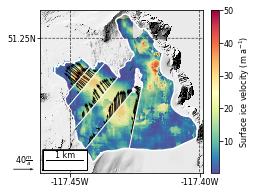

In [357]:
year =2018
I = np.abs(year - 2016) 
vf_list = ['illecillewaet_2016_all25m_vx.tif','illecillewaet_2017_all25m_vx.tif','illecillewaet_2018_all25m_vx.tif']
vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/' 
VX = vdir+ vf_list[I]
VY = vdir+ vf_list[I][:-7] + '_vy.tif' 

vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
msk = salem.open_xr_dataset(path+'illecillewaet_2014_extent_5m.tif') 
msk_reproj = vy.salem.transform(msk); msk = msk_reproj.to_array(name='msk')
msk.data[msk.data<0.0]=np.nan

vz = vy
vz.data = np.sqrt(vx.data**2 + vz.data**2 )
vz.data[vz.data<0.01]=np.nan; #vz.data[vz.data>50.0]=np.nan
vz.data[msk.data!=1.0] = np.nan;
# np.count_nonzero(~np.isnan(vz.data))/np.count_nonzero(~np.isnan(msk))


font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

fig, ax = plt.subplots(1, figsize=cm2inch(8.5,6.5))
grid1 = mercator_grid(center_ll=(-117.43, 51.237), extent=(4400, 4400)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
# grid = vx.salem.grid  ##full view
sm1 = Map(grid1, countries=False)
sm1.set_lonlat_contours(interval=0)
sm1.set_scale_bar(location=(0.15, 0.08),add_bbox=True,bbox_dy=1.1,linewidth=1.0)
VZA=xr.DataArray(data=vz, coords=vz.coords, dims=vz.dims, name='VZA', attrs=vz.attrs) #,indexes=vx.indexes fastpath=False)

# VZA.data=VZA.data*(msk+1.0)
sm1.set_data(VZA) 

sm1.set_cmap("Spectral_r")
sm1.set_vmax(val=50.)
# sm1.set_vmin(val=0)
#      Change the lon-lat countour setting
sm1.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
sm1.set_topography(topo,  relief_factor=0.8)
sm1.set_shapefile(gdf, lw=1.5, color='w')
sm1.set_shapefile(gates, color='w', lw=1.1)
sm1.append_colorbar(ax=ax, pad=0.1, label='Surface ice velocity (m a$^{-1}$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
sm1.plot(ax=ax)

u = df_agg.vx.values
v = df_agg.vy.values

X, Y = np.meshgrid(df_agg.lon,df_agg.lat)

# transform their coordinates to the map reference system and plot the arrows
xx, yy = sm1.grid.transform(df_agg.lon, df_agg.lat, crs=salem.wgs84)#sm1.grid.proj

# xx, yy = np.meshgrid(xx,yy)

# qu = ax.quiver(xx, yy, u, v)

###### start:stop:step
Q = ax.quiver(xx[::2], yy[::2], u[::2], v[::2])  #, pivot='mid')
qk = ax.quiverkey(Q, 0.07, 0.10, 40, r'$40 \frac{m}{a}$', labelpos='N', coordinates='figure', labelsep=0.025)



# Q = ax.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2], pivot='mid')
#Q= ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],pivot='mid', units='inches')

# X, Y = np.meshgrid(df_agg.lon,df_agg.lat)
# U = df_agg.vx.values
# V = df_agg.vy.values
# U,V = np.meshgrid(U, V)

# # Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
# Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')


fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_vel_gates_quiver'+str(year)+'.pdf', dpi=300)

In [ ]:
ITS_LIVE_mean = np.mean(VEL_LIST), np.std(VEL_LIST)
ITS_LIVE_mean

In [120]:
VEL_LIST

[17.082045375654065, 17.082045375654065, 17.082045375654065]

In [116]:
IND_V_mean = np.mean(VEL_LIST), np.std(VEL_LIST)
IND_V_mean

(13.82949919157234, 1.3761437644833465)

In [117]:
VEL_LIST_indV=VEL_LIST
VEL_LIST_indV

[15.349118230425972, 14.122650247549355, 12.016729096741694]

In [122]:
res = [i - j for i, j in zip(VEL_LIST_indV, VEL_LIST)] 
res2 =[i / j for i, j in zip(res, VEL_LIST_indV)]
np.mean(res2), np.std(res2)

(-0.2479907901620169, 0.12889290383947863)

In [125]:
vi=[((VEL_LIST_indV[0]-VEL_LIST_indV[1])/VEL_LIST_indV[1]),
((VEL_LIST_indV[0]-VEL_LIST_indV[2])/VEL_LIST_indV[2]),
((VEL_LIST_indV[2]-VEL_LIST_indV[1])/VEL_LIST_indV[2]),]
np.mean(vi),vi

(0.06296913937843866,
 [0.08684403857480226, 0.27731249550993436, -0.17524911594942064])

In [ ]:
year=2018
VDIR = 'individual'  # 'average' or 'individual'
ITS_LIVE = True
I = np.abs(year - 2016)

if VDIR == 'individual':
#     vf_list = ['img1_20160912__img1_20170917_vmap_5m_35px_spm2/', 'img1_20160912__img1_20170917_vmap_5m_35px_spm2/',
#            'img1_20170521__img1_20180426_vmap_5m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/

#         vf_list = ['img1_20160912__img1_20170521_vmap_5m_35px_spm2/', 'img1_20160912__img1_20170521_vmap_5m_35px_spm2/',
#                'img1_20180426__img2_20181016_vmap_5m_35px_spm2/']##backups  img1_20170917__img1_20180426_vmap_5m_35px_spm2/
    vf_list = ['illecillewaet_2016_all25m_vx.tif','illecillewaet_2017_all25m_vx.tif','illecillewaet_2018_all25m_vx.tif']
#     vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/spm2/' + vf_list[I]
    vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/' 
#         VX = vdir+ vf_list[I][:-1] + '-F_vx.tif' 
#         VY = vdir+ vf_list[I][:-1] + '-F_vy.tif' 
    VX = vdir+ vf_list[I]
    VY = vdir+ vf_list[I][:-7] + '_vy.tif' 
    ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'
else:
#         vf_list = ['illec_all_spm2_5m', 'illec_all_spm2_5m', 'illec_all_spm2_5m']
#         vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/spm2/'  
#         VX = vdir+ 'vx/' +vf_list[I] + '_vx.tif' 
#         VY = vdir+ 'vy/' +vf_list[I] + '_vy.tif'
    vf = 'illecillewaet_all_dem3m_'
    vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'  
    VX = vdir + vf + 'blur1_25m_vx_neg.tif' #'vx_best_neg_5m.tif'
    VY = vdir + vf + 'blur1_25m_vy.tif'
#         VM = vdir + vf + 'vm_5m.tif'
    ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'

topo = path + '160912_illecillewaet_dem1_clip_master.tif'

vx = salem.open_xr_dataset(VX);vy = salem.open_xr_dataset(VY);vx = vx.to_array(name='vx');vy = vy.to_array(name='vy')
msk = salem.open_xr_dataset(fl_path + 'illec_all_glaciers_2016.tif') 
extent=salem.open_xr_dataset(path +'illecillewaet_2014_extent_5m.tif')

# msk = msk.to_array(name='msk')
gpr = salem.open_xr_dataset(fl_path + 'gpr_outline_50_100m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
farin = salem.open_xr_dataset(farinotti)

H_opt = salem.open_xr_dataset(fl_path+'Illecillewaet_251sw_MAE_optimized.tif')#+'Illecillewaet101sw_MAE_optimized.tif') 

msk_reproj = vx.salem.transform(msk);msk = msk_reproj.to_array(name='msk')
extent_reproj=vx.salem.transform(extent); extent = extent_reproj.to_array(name='extent')
gpr_reproj = vx.salem.transform(gpr); gpr = gpr_reproj.to_array(name='gpr')
ITS = salem.open_xr_dataset(ITS); ITS_reproj = vx.salem.transform(ITS);ITS = ITS_reproj.to_array(name='ITS')

gpr.data[gpr.data<0] = np.nan
gpr.data[gpr.data<1.5] = 0.0   #not having any effect
VZ = np.sqrt(vx.data**2 + vy.data**2 )
vx.data[msk.data==0] = np.nan
vy.data[msk.data==0] = np.nan

VZ_off_ice = VZ.copy()
VZ_off_ice[msk.data>0.0] = np.nan
# VZ_off_ice[VZ_off_ice==0.0] = np.nan
VZ[extent.data<1.0] = np.nan
DIFF = VZ - ITS
dem = salem.open_xr_dataset(topo)
dem_reproj = vx.salem.transform(dem)
dem = dem_reproj.to_array(name='dem')
dem.data[dem.data<1] = np.nan


In [ ]:
fig3, ax3 = plt.subplots(1,1, sharex=True, sharey=True, figsize=(cm2inch(12, 12.))) 
grid = vx.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
sm.set_scale_bar()
VZ[VZ<0.50] = np.nan

sm.set_data(VZ-ITS) #, label='m')
sm.set_vmax(val=15.);sm.set_vmin(val=-15.);
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
# off_ice_V = np.nanmean(VZ_off_ice)
diff = np.nanmean(VZ-ITS)
print(diff)
print(diff/np.nanmean(VZ))
# print(off_ice_V)
# print(np.nanstd(VZ_off_ice))
gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, linewidth=1)
sm.set_shapefile(gates, linewidth=1.5, color='r')
sm.visualize()

In [ ]:
np.std([0.30,0.21,0.35])


In [ ]:
####### Net flux uncertainty #################
np.sum(new.sQout)/np.sum(new.Q_out)
print(np.mean([new.sBwe_opt,FG_all.sBwe_gpr,new.sBwe_F]))

In [ ]:
pd.set_option('display.max_rows', None)
new

In [102]:
residuals= [z_range_all,gpr_bdiff,farin_bdiff,opt_bdiff,obs_bin_all]

r = pd.DataFrame(list(zip(z_range_all,elev_all,gpr_bdiff,farin_bdiff,opt_bdiff,gpr_bd_fg,opt_bd_fg,farin_bd_fg,
                          obs_bin_all,obs_fg_all,obs_fg_all_med,gpr_bd_fg_med,opt_bd_fg_med,farin_bd_fg_med)), 
                  columns=['z_range_all','elev_all','gpr_bdiff','farin_bdiff','opt_bdiff','gpr_bd_fg','opt_bd_fg','farin_bd_fg',
                           'obs_bin_all','obs_fg_all','obs_fg_all_med','gpr_bd_fg_med','opt_bd_fg_med','farin_bd_fg_med']) 
r['zrel'] = r.elev_all-r.z_range_all.min()
r.zrel= r.zrel / r.zrel.max()

r['gpr_fr']=r.gpr_bdiff/np.abs(r.obs_bin_all);r['far_fr']=r.farin_bdiff/np.abs(r.obs_bin_all);
r['opt_fr']=r.opt_bdiff/np.abs(r.obs_bin_all); 
## for FG bins by mean
r['opt_bd_fr']=r.opt_bd_fg/np.abs(r.obs_fg_all)
r['farin_bd_fr']=r.farin_bd_fg/np.abs(r.obs_fg_all);r['gpr_bd_fr']=r.gpr_bd_fg/np.abs(r.obs_fg_all);
## for FG bins by mean
r['opt_bd_med_fr']=r.opt_bd_fg_med/np.abs(r.obs_fg_all_med)
r['farin_bd_med_fr']=r.farin_bd_fg_med/np.abs(r.obs_fg_all_med);r['gpr_bd_med_fr']=r.gpr_bd_fg_med/np.abs(r.obs_fg_all_med);

In [34]:
r

,z_range_all,elev_all,gpr_bdiff,farin_bdiff,opt_bdiff,gpr_bd_fg,opt_bd_fg,farin_bd_fg,obs_bin_all,obs_fg_all,obs_fg_all_med,gpr_bd_fg_med,opt_bd_fg_med,farin_bd_fg_med,zrel,gpr_fr,far_fr,opt_fr,opt_bd_fr,farin_bd_fr,gpr_bd_fr,opt_bd_med_fr,farin_bd_med_fr,gpr_bd_med_fr
0,2050.0,2224.108643,NaN,NaN,NaN,1.150198,0.009107,0.212939,NaN,-3.763,-4.495,0.418198,-0.722893,-0.519061,0.330241,NaN,NaN,NaN,0.002420,0.056587,0.305660,-0.160822,-0.115475,0.093036
1,2150.0,2322.538086,0.213,-0.724,-0.928,0.206202,1.658052,0.437223,-4.700,-1.845,-1.845,0.206202,1.658052,0.437223,0.516937,0.045319,-0.154043,-0.197447,0.898673,0.236977,0.111763,0.898673,0.236977,0.111763
2,2250.0,2390.635742,1.703,0.766,0.562,-0.017102,0.773993,0.241317,-3.210,-0.997,-0.480,0.499898,1.290993,0.758317,0.646101,0.530530,0.238629,0.175078,0.776322,0.242043,-0.017153,2.689569,1.579827,1.041455
3,2350.0,2460.371582,-0.329,-0.085,0.792,1.001344,0.169480,0.208489,-1.845,0.073,0.000,0.928344,0.096480,0.135489,0.778373,-0.178320,-0.046070,0.429268,2.321647,2.856020,13.717040,inf,inf,inf
4,2450.0,2532.567871,1.628,0.835,0.796,-0.756861,-0.633525,-0.446498,0.700,0.640,0.700,-0.696861,-0.573525,-0.386498,0.915311,2.325714,1.192857,1.137143,-0.989883,-0.697653,-1.182596,-0.819322,-0.552140,-0.995516
5,2550.0,2577.217285,-0.368,-0.086,-0.285,0.051608,0.094132,0.304802,0.610,0.610,0.610,0.051608,0.094132,0.304802,1.000000,-0.603279,-0.140984,-0.467213,0.154314,0.499676,0.084604,0.154314,0.499676,0.084604
6,2650.0,2224.108643,0.662,0.915,0.704,0.840652,-0.172908,0.015543,1.220,-3.950,-4.640,0.150652,-0.862908,-0.674457,0.330241,0.542623,0.750000,0.577049,-0.043774,0.003935,0.212823,-0.185972,-0.145357,0.032468
7,2050.0,2322.538086,NaN,NaN,NaN,0.450647,1.688477,0.600850,NaN,-2.230,-2.230,0.450647,1.688477,0.600850,0.516937,NaN,NaN,NaN,0.757165,0.269439,0.202084,0.757165,0.269439,0.202084
8,2150.0,2390.635742,0.151,-0.674,-0.863,0.367204,1.222301,0.638489,-4.640,-1.677,-1.500,0.544204,1.399301,0.815489,0.646101,0.032543,-0.145259,-0.185991,0.728862,0.380733,0.218965,0.932867,0.543659,0.362803
9,2250.0,2460.371582,1.831,1.006,0.817,0.455173,-0.431440,-0.227179,-2.960,-1.035,-1.035,0.455173,-0.431440,-0.227179,0.778373,0.618581,0.339865,0.276014,-0.416851,-0.219496,0.439781,-0.416851,-0.219496,0.439781


In [226]:
np.nanmin(dem.data[msk.data==1.0])

1848.8326

In [227]:
# DATA=[];D2=[]
# z=[]
# # s= [r.opt_bdiff, r.farin_bdiff,r.gpr_bdiff]
# s= [r.opt_bd_fg, r.farin_bd_fg,r.gpr_bd_fg]
# s1=[r.opt_bd_med_fr, r.farin_bd_med_fr,r.gpr_bd_med_fr]
# for i in range(3):
#     DATA.extend(s[i])
#     D2.extend(s1[i])
#     z.extend(r.zrel)
    
# DF = pd.DataFrame(list(zip(DATA,D2,z)),   columns=['r_data','r_frac','zrel'])
# DF.dropna(subset=['r_data'],inplace=True)
# # DF.r_frac[np.abs(DF.r_frac)>4]=np.nan;DF.dropna(subset=['r_frac'],inplace=True)
# print(len(DF))
# DF.r_data[np.abs(DF.r_frac)>0.5]=np.nan;DF.dropna(subset=['r_data'],inplace=True)
# print(len(DF))

In [228]:
# 1-(26/54)

In [229]:
y1=np.array([2016]*6);y2=np.array([2017]*6);y3=np.array([2018]*6);Years=np.concatenate([y1,y2,y3])
r['year']=Years
# r.z_range_all[r.z_range_all==2750.0]=np.nan;#
# for n in range(len(r)):
#     if (r.z_range_all[n]>2400) and (r.year[n]==2018):
#         r.z_range_all[n]=np.nan
#     if (r.z_range_all[n]>2750.0) and (r.year[n]==2017):
#         r.z_range_all[n]=np.nan
#     if (r.z_range_all[n]>2450.0 or r.z_range_all[n]==2550.0) and (r.year[n]==2017):
#         r.z_range_all[n]=np.nan

# # r.z_range_all[ & r.year<2018]=np.nan
r.dropna(subset=['z_range_all'],inplace=True)
# r

In [103]:
fig_path= '/home/pelto/Desktop/ice_flux/figures/'
with open(fig_path + glacier[gl]+'_residuals.pkl', 'wb') as f:    #_NOfirn
    pickle.dump(r, f)

In [239]:
import scipy.stats as stats
stats.f_oneway(obs_fg_all,gpr_all),stats.f_oneway(obs_fg_all,opt_all) ,stats.f_oneway(obs_fg_all,farin_all) 

(F_onewayResult(statistic=0.08820838656765408, pvalue=0.7682742536555284),
 F_onewayResult(statistic=0.18269146824258015, pvalue=0.6717653024361637),
 F_onewayResult(statistic=0.010139420990552272, pvalue=0.9203842759991278))

In [ ]:
AV=[]
for i in range(len(new)):
    AV.append(np.nanmean([new.b_fg_h[i]-new.Vfirn[i], new16.b_fg_h_gpr[i]-new16.Vfirn[i], new17.b_fg_hF[i]-new17.Vfirn[i]]))
AV

In [168]:
print('mean percent smb error:', round(np.nanmean([np.abs(new16.sBwe_F/new16.b_fg_weF),np.abs(new16.sBwe_gpr/new16.b_fg_we_gpr),
                                             np.abs(new16.sBwe_opt/new16.b_fg_we),np.abs(new17.sBwe_F/new17.b_fg_weF),np.abs(new17.sBwe_gpr/new17.b_fg_we_gpr),
                                             np.abs(new17.sBwe_opt/new17.b_fg_we),np.abs(new.sBwe_F/new.b_fg_weF),np.abs(new.sBwe_gpr/new.b_fg_we_gpr),
                                             np.abs(new.sBwe_opt/new.b_fg_we)]),2))

print('mean flux error:',round(np.nanmean([new16.spQo_gpr,new16.spQout,new16.spQoutF]),1))

mean_error= np.mean([new16.sBwe_opt.mean(),new16.sBwe_F.mean(),new16.sBwe_gpr.mean(),new17.sBwe_opt.mean(),
            new17.sBwe_F.mean(),new17.sBwe_gpr.mean(),new.sBwe_opt.mean(),new.sBwe_F.mean(),new.sBwe_gpr.mean()])
print('mean SMB error:', round(mean_error,2))

mean percent smb error: 1.98
mean flux error: 24.2
mean SMB error: 0.56


In [291]:
### cross section area comparison ###
R= np.sum(new.cr_area)/np.sum(new.cr_areaF)
Ri=new16.cr_area/new16.cr_area_gpr
R=R-1
print(R)
# R[R>0.4]=np.nan
R.mean()
GR=new.cr_area_gpr/new.cr_areaF

# GR=GR-1
print(GR)
GR.median()

0.3648710095792036
0         NaN
1    1.395786
2    1.095508
3    0.978317
4    1.412542
5    1.743346
dtype: float64


1.39578578629272

In [65]:
a=[];b=[];c=[]
for i in range(len(new16.cr_area)-1):
    a.append(new16.cr_area_gpr[i]/new16.cr_area_gpr[i+1])
    b.append(new16.cr_area[i]/new16.cr_area[i+1])
    c.append(new16.cr_areaF[i]/new16.cr_areaF[i+1])
dcr=pd.DataFrame(list(zip(a,b,c)),columns=['a','b','c'])
dcr['ab']=1-dcr.a/dcr.b;dcr['bc']=1-dcr.b/dcr.c;dcr['ac']=1-dcr.a/dcr.c
dcr.ab.median(),dcr.bc.median(),dcr.ac.median()

(-0.08152526326052212, 0.12782929574488694, 0.05925392713172983)

In [293]:
dcr

,a,b,c,ab,bc,ac
0,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,0.563222,0.348925,0.442055,-0.614165,0.210676,-0.274100
2,0.653605,0.558374,0.583687,-0.170551,0.043367,-0.119787
3,0.704285,1.075863,1.016881,0.345376,-0.058003,0.307406
4,0.882826,0.857488,1.089576,-0.029549,0.213008,0.189752


In [188]:
GRi=new16.cr_area_gpr/new16.cr_area
GR= np.sum(new.cr_area_gpr)/np.sum(new.cr_area)
GR-1

-0.028957258220220217

In [192]:
np.nanmedian(D_all.vfg)

8.70550570568146

In [ ]:
np.mean([new.Q_netAF[0], new.Q_netA_gpr[0], new.Q_netA[0]])

In [ ]:
########## Calculate glacier-wide SMB and compare with field obs #######################
SMB = [new16.b_fg_we_gpr,new17.b_fg_we_gpr,new.b_fg_we_gpr, new16.b_fg_we,new17.b_fg_we,new.b_fg_we,
      new16.b_fg_weF,new17.b_fg_weF,new.b_fg_weF]
Bn=[]
for i in range(len(SMB)):
    MB=SMB[i]*new.dem_count
    A=np.sum(MB)/np.sum(new.dem_count)
    Bn.append(round(A,2))
field=[-0.19,-0.84,-1.05,-0.19,-0.84,-1.05,-0.19,-0.84,-1.05]

MB_df = pd.DataFrame(list(zip(field, Bn)), 
            columns=['field', 'flux_bn'])

MB_df['MBAL_diff']=MB_df.field-MB_df.flux_bn

print(MB_df.MBAL_diff.mean())
MB_df

In [ ]:
np.mean([new.dh_mean[0], new16.dh_mean[0], new17.dh_mean[0]])

In [ ]:
glacier

In [ ]:
fig_path= '/home/pelto/Desktop/ice_flux/figures/'

with open(fig_path + glacier[2]+'_vfg_all.pkl', 'wb') as f:
    pickle.dump(vfg_all, f)
with open(fig_path + glacier[2]+ '_gate_elev.pkl', 'wb') as f:
    pickle.dump(gate_elev, f)
new.to_csv(fig_path + glacier[2]+'_new_2018.csv')

# with open(fig_path + glacier[1] +'_vfg_all.pkl', 'rb') as f:
#     vfg_all = pickle.load(f)
# with open(fig_path + glacier[1] + 'gate_elev.pkl', 'rb') as f:
#     gates_elev = pickle.load(f)

In [ ]:
pd.set_option('display.max_columns', None)
new

In [ ]:
fig3, ax3 = plt.subplots(1,1, sharex=True, sharey=True, figsize=(2.85,2.75)) ##mass conservation plot

Yvv = [new.Q_netA_gpr, new.Q_netA, new.Q_netAF]
Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']

AX=ax3.twinx()
for i in range(3):
    ax3.scatter(new.dem_mean, Yvv[i], edgecolor='k', marker=sym[i+1], alpha=0.6, label=Yvv_lbl[i], s=35, 
                       color=color[i+1], zorder=2, linewidth=0.25)
meanlineprops = dict(linestyle='--', lw=1., color='#cb181d');medianprops = dict(linestyle='-', lw=1.,color='k')
BOXVEL=AX.boxplot(vfg_all,meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,
                  sym='', positions=[2188., 2288., 2351., 2440., 2517.,2536.,2565., 2591.],widths=25, zorder=1)

ax3.set_xticks([2100, 2200,  2300, 2400, 2500, 2600])  #, 2650])
ax3.set_xticklabels([2100, 2200,  2300, 2400, 2500, 2600]) 
ax3.set(xlim=(2090, 2650))
ax3.legend(loc='upper right', labelspacing=0.35)

fig3.text(0.005, 0.65, r'$V^{\uparrow}$' + '(m ice $a^{-1}$)',rotation=90) #transform=ax3.transAxes)
fig3.text(0.94, 0.7, 'Ice velocity (m $a^{-1}$)',rotation=90)

ax3.set_zorder(1)
ax3.patch.set_visible(False)

fig3.subplots_adjust(bottom=0.11, top=0.98, hspace=0.1, left=0.12, right=0.85, wspace=0.05)
fig3.savefig(fl_path + 'products/' + glacier[gl] + '_Velocities.pdf', dpi=300)

# Illec Stats

In [9]:
# MSE_ABL,MSE_ACC, 'MSE_ABL','MSE_ACC',RSR, NSE,
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
ELA_sat=[];sELA_sat=[]
for i in range(len(ELA)):
    ELA_sat= ELA_sat+ ([ELA[i]] * 4)
    sELA_sat= sELA_sat+ ([s_ELA[i]] * 4)
ELA_sat,sELA_sat

method=[]
for i in range(4):
    method.extend(label)
len(method)
STATS=pd.DataFrame(list(zip(method,SL_L[:,0], SE_L[:,1],SL[:,0], SE[:,1],SL[:,1], SE[:,2], ELA_lin ,ELA_sat,sELA_sat,ME,MAE)),#PBias 
                     columns=['method','ALL','ALLse','ABL', 'ABLse', 'ACC', 'ACCse', 'ELA', 'ELA_sat' ,'sELA_sat','ME','MAE']) #'PBias'
STATS.ALL=STATS.ALL*1000;STATS.ALLse=STATS.ALLse*1000;STATS.ABL=STATS.ABL*1000;STATS.ABLse=STATS.ABLse*1000;
STATS.ACC=STATS.ACC*1000;STATS.ACCse=STATS.ACCse*1000
STATS

# STATS.ACC[STATS.method=='Observed'].min()/STATS.ACC[STATS.method=='Observed'].max()
# STATS.ACC.mean()/STATS.ABLse.mean()

# STATS=pd.read_pickle(FLP+Glacier[1]+ '/' + glacier[1]+ '_NOfirn_PW_stats.pkl')
# STATS

M= ['Observed','FG IPR','FG OGGM','FG Farinotti']
for m in M:
    L= STATS[STATS.method==m].values
    MEAN= np.nanmean(L[:,1:],axis=0)
    MEAN= np.insert(MEAN,0,m)
    STATS= STATS.append(dict(zip(STATS.columns, MEAN)),ignore_index=True)
STATS=STATS.round(2);STATS.ALLse=STATS.ALLse.round(1)#STATS.ABLse=STATS.ABLse.round(1);STATS.ACCse=STATS.ACCse.round(1);
STATS.ACCse=np.nan;STATS.ACC=np.nan;STATS.ABL=np.nan;STATS.ABLse=np.nan
STATS.ELA=STATS.ELA.round(0);STATS.ELA=pd.to_numeric(STATS.ELA, downcast='integer')  #.round(0)#STATS.PBias=STATS.PBias.round(1)
STATS.ELA_sat=STATS.ELA_sat.round(0);STATS.ELA_sat=pd.to_numeric(STATS.ELA_sat, downcast='integer') 
STATS.sELA_sat=STATS.sELA_sat.round(0);STATS.sELA_sat=pd.to_numeric(STATS.sELA_sat, downcast='integer') 
if firn == True:
    STATS.to_pickle(fl_path+glacier[gl]+'_stats_firn_LIN_stats.pkl')
else:
    STATS.to_pickle(fl_path+glacier[gl]+'_stats_NOfirn_LIN_stats.pkl')
#     STATS.to_pickle(fl_path+'conrad_stats_ITS_LIVE_NOfirn.pkl')
#     STATS.to_pickle(fl_path+glacier[gl]+'_stats_mosaic_NOfirn.pkl')
STATS

e=(STATS[:-4].ELA_sat - STATS[:-4].ELA)
e.mean(),e
STATS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,ELA,ELA_sat,sELA_sat,ME,MAE
0,Observed,12.62,1.5,NaN,NaN,NaN,NaN,2488,2500,75,0.00,0.00
1,FG IPR,15.83,3.0,NaN,NaN,NaN,NaN,2491,2500,75,0.27,0.57
2,FG OGGM,15.30,2.4,NaN,NaN,NaN,NaN,2498,2500,75,0.34,0.57
3,FG Farinotti,13.59,1.9,NaN,NaN,NaN,NaN,2494,2500,75,0.16,0.32
4,Observed,12.40,0.7,NaN,NaN,NaN,NaN,2528,2540,70,0.00,0.00
5,FG IPR,12.92,1.9,NaN,NaN,NaN,NaN,2561,2540,70,0.49,0.52
6,FG OGGM,12.55,2.6,NaN,NaN,NaN,NaN,2571,2540,70,0.56,0.74
7,FG Farinotti,11.10,1.6,NaN,NaN,NaN,NaN,2576,2540,70,0.38,0.46
8,Observed,11.60,2.1,NaN,NaN,NaN,NaN,2534,2525,70,0.00,0.00
9,FG IPR,12.44,2.0,NaN,NaN,NaN,NaN,2495,2525,70,-0.39,0.49


In [6]:
len(e[e>100])
e=(STATS[:-4].ELA_sat - STATS[:-4].ELA)
e.mean(),e

(1.9166666666666667,
 0     12
 1      9
 2      2
 3      6
 4     12
 5    -21
 6    -31
 7    -36
 8     -9
 9     30
 10    23
 11    26
 dtype: int16)

In [141]:
new16.RHO_g.mean()

0    910.000000
1    910.000000
2    910.000000
3    904.439747
4    887.809097
5    882.845909
Name: RHO_g, dtype: float64

In [305]:
# rng_ab=[];rng_ac=[]
# for m in M:
#     mn= STATS.ABL[STATS.method==m].min(); mx=STATS.ABL[STATS.method==m].max()
#     mnc= STATS.ACC[STATS.method==m].min(); mxc=STATS.ACC[STATS.method==m].max()
#     rng_ab.append(mn/mx);rng_ac.append(mnc/mxc);
# rng_ab, rng_ac

In [306]:
# np.mean(STATS.ABLse), np.mean(STATS.ACCse)

In [307]:
# for m in M:
#     L= STATS[STATS.method==m].values
#     MEAN= np.nanmean(L[:,1:],axis=0)
#     MEAN= np.insert(MEAN,0,m)
#     STATS= STATS.append(dict(zip(STATS.columns, MEAN)),ignore_index=True)
# STATS=STATS.round(2);STATS.ABLse=STATS.ABLse.round(1);STATS.ACCse=STATS.ACCse.round(1);STATS.ALLse=STATS.ALLse.round(1)
# STATS.PBias=STATS.PBias.round(1)
# STATS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,PBias,ME,MAE
0,Observed,12.61,1.5,0.02,0.0,0.00,0.0,0.0,0.00,0.00
1,FG IPR,14.99,2.6,0.02,0.0,0.01,0.0,-40.4,0.36,0.49
2,FG OGGM,14.51,2.3,0.02,0.0,0.01,0.0,-48.6,0.43,0.53
3,FG Farinotti,13.02,1.8,0.02,0.0,0.00,0.0,-25.1,0.22,0.28
4,Observed,12.39,0.7,0.01,0.0,0.01,0.0,0.0,0.00,0.00
5,FG IPR,13.18,1.6,0.01,0.0,-0.01,0.0,-35.5,0.48,0.49
6,FG OGGM,12.77,2.6,0.01,0.0,-0.00,0.0,-39.8,0.54,0.75
7,FG Farinotti,11.43,1.4,0.01,0.0,-0.01,0.0,-26.3,0.36,0.43
8,Observed,11.59,2.1,0.01,0.0,-0.01,0.0,0.0,0.00,0.00
9,FG IPR,11.85,1.9,0.01,0.0,-0.01,0.0,25.2,-0.34,0.37


In [14]:
S1=STATS.copy()
AB=[];AC=[];AL=[];EL=[];
for i in range(len(S1)):
    AL.append(str(S1.ALL[i])+' $\pm$ '+str(S1.ALLse[i]))
    AB.append(str(S1.ABL[i])+' $\pm$ '+str(S1.ABLse[i]))
    AC.append((str(S1.ACC[i])+' $\pm$ '+str(S1.ACCse[i])))
    EL.append((str(S1.ELA_sat[i])+' $\pm$ '+str(S1.sELA_sat[i])))
S1.ABL=AB;S1.ACC=AC;S1.ALL=AL;S1.ELA_sat=EL
S1.drop(columns=['ABLse','ABL','ACCse','ACC','ALLse','sELA_sat'], inplace=True)
S1

,method,ALL,ELA,ELA_sat,ME,MAE
0,Observed,12.62 $\pm$ 1.5,2488,2500 $\pm$ 75,0.00,0.00
1,FG IPR,15.83 $\pm$ 3.0,2491,2500 $\pm$ 75,0.27,0.57
2,FG OGGM,15.3 $\pm$ 2.4,2498,2500 $\pm$ 75,0.34,0.57
3,FG Farinotti,13.59 $\pm$ 1.9,2494,2500 $\pm$ 75,0.16,0.32
4,Observed,12.4 $\pm$ 0.7,2528,2540 $\pm$ 70,0.00,0.00
5,FG IPR,12.92 $\pm$ 1.9,2561,2540 $\pm$ 70,0.49,0.52
6,FG OGGM,12.55 $\pm$ 2.6,2571,2540 $\pm$ 70,0.56,0.74
7,FG Farinotti,11.1 $\pm$ 1.6,2576,2540 $\pm$ 70,0.38,0.46
8,Observed,11.6 $\pm$ 2.1,2534,2525 $\pm$ 70,0.00,0.00
9,FG IPR,12.44 $\pm$ 2.0,2495,2525 $\pm$ 70,-0.39,0.49


In [15]:
print(S1.to_latex(index=False)) 

\begin{tabular}{llrlrr}
\toprule
       method &              ALL &   ELA &        ELA\_sat &    ME &   MAE \\
\midrule
     Observed &  12.62 \$\textbackslash pm\$ 1.5 &  2488 &  2500 \$\textbackslash pm\$ 75 &  0.00 &  0.00 \\
       FG IPR &  15.83 \$\textbackslash pm\$ 3.0 &  2491 &  2500 \$\textbackslash pm\$ 75 &  0.27 &  0.57 \\
      FG OGGM &   15.3 \$\textbackslash pm\$ 2.4 &  2498 &  2500 \$\textbackslash pm\$ 75 &  0.34 &  0.57 \\
 FG Farinotti &  13.59 \$\textbackslash pm\$ 1.9 &  2494 &  2500 \$\textbackslash pm\$ 75 &  0.16 &  0.32 \\
     Observed &   12.4 \$\textbackslash pm\$ 0.7 &  2528 &  2540 \$\textbackslash pm\$ 70 &  0.00 &  0.00 \\
       FG IPR &  12.92 \$\textbackslash pm\$ 1.9 &  2561 &  2540 \$\textbackslash pm\$ 70 &  0.49 &  0.52 \\
      FG OGGM &  12.55 \$\textbackslash pm\$ 2.6 &  2571 &  2540 \$\textbackslash pm\$ 70 &  0.56 &  0.74 \\
 FG Farinotti &   11.1 \$\textbackslash pm\$ 1.6 &  2576 &  2540 \$\textbackslash pm\$ 70 &  0.38 &  0.46 \\
     Obs

In [ ]:
# STATS=STATS.append(Sall,ignore_index=True,sort=False)
# STATS=STATS.round(2)
# STATS
firn

In [256]:
STATS.to_pickle(fl_path+'illecillewaet_stats_ITS_LIVE_NOfirn.pkl')#'illecillewaet_LIN_NOfirn_stats.pkl') #_NOfirn

In [202]:
# LIN_firn_STATS=STATS
LIN_NOfirn_STATS=STATS
LIN_NOfirn_STATS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,PBias,ME,MAE
0,Observed,12.61,1.5,0.02,0.0,0.00,0.0,0.0,0.00,0.00
1,FG IPR,14.99,2.6,0.02,0.0,0.01,0.0,-40.4,0.36,0.49
2,FG OGGM,14.51,2.3,0.02,0.0,0.01,0.0,-48.6,0.43,0.53
3,FG Farinotti,13.02,1.8,0.02,0.0,0.00,0.0,-25.1,0.22,0.28
4,Observed,12.39,0.7,0.01,0.0,0.01,0.0,0.0,0.00,0.00
5,FG IPR,13.18,1.6,0.01,0.0,-0.01,0.0,-35.5,0.48,0.49
6,FG OGGM,12.77,2.6,0.01,0.0,-0.00,0.0,-39.8,0.54,0.75
7,FG Farinotti,11.43,1.4,0.01,0.0,-0.01,0.0,-26.3,0.36,0.43
8,Observed,11.59,2.1,0.01,0.0,-0.01,0.0,0.0,0.00,0.00
9,FG IPR,11.85,1.9,0.01,0.0,-0.01,0.0,25.2,-0.34,0.37


In [203]:
LFS=LIN_firn_STATS.tail(4) 
LFS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,PBias,ME,MAE
12,Observed,12.19,1.4,0.01,0.0,0.0,0.0,0.0,0.00,0.00
13,FG IPR,14.33,1.9,0.02,0.0,0.0,0.0,-7.9,0.06,0.49
14,FG OGGM,13.82,2.3,0.02,0.0,0.0,0.0,-14.1,0.13,0.66
15,FG Farinotti,12.52,1.3,0.01,0.0,-0.0,0.0,2.3,-0.05,0.42


In [204]:
LNFS=LIN_NOfirn_STATS.tail(4) 
LNFS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,PBias,ME,MAE
12,Observed,12.19,1.4,0.01,0.0,0.0,0.0,0.0,0.00,0.00
13,FG IPR,13.34,2.0,0.02,0.0,-0.0,0.0,-16.9,0.17,0.45
14,FG OGGM,12.83,2.3,0.01,0.0,0.0,0.0,-23.0,0.24,0.64
15,FG Farinotti,11.53,1.5,0.01,0.0,-0.0,0.0,-6.6,0.05,0.42


In [208]:
LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL-LNFS.ALL[12])/LNFS.ALL[12]
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

(0.03089964451736399, 0.076562072660916)

In [257]:
STATS['ALL_firn']=LFS.ALL
STATS['pdiff_obs']=(STATS.ALL-STATS.ALL[12])/STATS.ALL[12]
STATS.pdiff_obs[1:].mean(),STATS.pdiff_obs[1:].std(),

(-0.22444626743232152, 0.12771649418901967)

In [161]:
LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL_firn-LNFS.ALL[12])/LNFS.ALL[12]
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

(0.11211375444353298, 0.076562072660916)

In [258]:
## Calc PBIAS for slopes
for i in range(3):
    D=STATS.ALL[STATS.method==(method[i+1])][:-1].values
    O=STATS.ALL[STATS.method=='Observed'][:-1].values
    e=evaluator(pbias, D,O)
    print(method[i+1],e )

FG IPR [28.47772615]
FG OGGM [23.91363761]
FG Farinotti [31.07406395]


In [205]:
STATS_LIN=STATS[['method','ALL','ALLse','PBias','ME','MAE']]
SL1=STATS_LIN.tail(4)
AB=[];AC=[];AL=[]
for i in SL1.index:
    AL.append(str(SL1.ALL[i])+' $\pm$ '+str(SL1.ALLse[i]))
SL1.ABL=AB;SL1.ACC=AC;SL1.ALL=AL
SL1.drop(columns=['ALLse'], inplace=True)
SL1
print(SL1.to_latex(index=False)) 
# SL1

\begin{tabular}{llrrr}
\toprule
       method &              ALL &  PBias &    ME &   MAE \\
\midrule
     Observed &  12.19 \$\textbackslash pm\$ 1.4 &    0.0 &  0.00 &  0.00 \\
       FG IPR &  13.34 \$\textbackslash pm\$ 2.0 &  -16.9 &  0.17 &  0.45 \\
      FG OGGM &  12.83 \$\textbackslash pm\$ 2.3 &  -23.0 &  0.24 &  0.64 \\
 FG Farinotti &  11.53 \$\textbackslash pm\$ 1.5 &   -6.6 &  0.05 &  0.42 \\
\bottomrule
\end{tabular}



In [261]:
1-STATS.ALL.tail(3).mean()/LNFS.ALL.mean()  #.MAE.mean()

0.29418053050043436

In [ ]:
# method=[]
# for i in range(4):
#     method.extend(M)
# len(method)
Sall=pd.DataFrame(list(zip(method,np.array(SLa)[:,0], np.array(SEa)[:,1],np.array(SLa)[:,1], np.array(SEa)[:,2])), 
                     columns=['method','ABL', 'ABLse', 'ACC', 'ACCse'])
Sall.ABL=Sall.ABL*1000;Sall.ABLse=Sall.ABLse*1000;Sall.ACC=Sall.ACC*1000;Sall.ACCse=Sall.ACCse*1000
Sall

In [ ]:
all_bin=x_bin
all_bin.append(y_bin)

In [324]:
all_bin=[obs.Ba[(obs.Year>2015) & (obs.Year < 2019)],gpr_all,opt_all,farin_all,obs.Elev[(obs.Year>2015) & (obs.Year < 2019)],elev_all,elev_all,elev_all]

In [325]:
with open(fl_path+ 'ALL_list.pkl', 'wb') as f:
    pickle.dump(all_bin, f)

In [327]:
np.mean([4.79,4.79,5.36]),np.std([4.79,4.79,5.36])

46.55332

In [ ]:
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
obs = pd.read_csv(fl_path+ 'Illecillewaet_bdot.csv') 
obs=obs[obs.Year>2015]
obs.dropna(subset=['Ba'],inplace=True)
# obs=obs[obs.Year==2016 and obs.Year==2017 and obs.Year==2018]
SLa=[];SEa=[]
############## piecewise function ########################################         
fig3, ax3 = plt.subplots(1, sharex=True, sharey=True, figsize=(cm2inch(8.5, 8.5)))
y_bin=[obs.Ba,gpr_all,opt_all,farin_all]; x_bin=[obs.Elev,elev_all,elev_all,elev_all]
# y_bin=[obs_all,gpr_ALL,opt_all,farin_all]; x_bin=[z_range_all,zr_gpr,z_range_all,z_range_all]
x0=2500
def piecewise_linear(x, x0, y0, k1, k2):
   
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   

for i in range(4):      
#     if i > 0 and year==2016:
#         x0=2470
#     else:
#         x0=2430
    ##pwlf
    Y=np.array(y_bin[i])
    X=np.array(x_bin[i])
    model = pwlf.PiecewiseLinFit(X, Y)
    breakpoints = [2040.,x0,2680.]
    model.fit_with_breaks(breakpoints)
    x_hat = np.arange(2040., 2660., 10.)
    y_hat = model.predict(x_hat)
    plt.plot(x_hat, y_hat, lw=1., alpha=1, color=color[i],zorder=1)
    SLa.append(model.slopes)
    SEa.append(model.standard_errors())
    
    x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
    p , e = curve_fit(piecewise_linear, x1, y1 )
#     perr = np.sqrt(np.diag(e))
#     print(perr)
    xd = np.linspace(2040, 2660, 10)
#     ax3.plot(xd, piecewise_linear(xd, *p), color=color[i], label=label[i], lw=1.0)
    # mean square error of the lines
   

    MSE_res=[]
    for Line in range(2):
        Pred=[];Act=[]
        if Line ==0:
            INDEX= np.where(x1<x0)[0]
            for ix in INDEX:
                Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                Act.append(y1[ix])

            MSE_res.append(MSE(Act,Pred))
        if Line==1:
            INDEX= np.where(x1>=x0)[0]
            for ix in INDEX:
                Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
                Act.append(y1[ix])

            MSE_res.append(MSE(Act,Pred))
    ax3.scatter(x_bin[i], y_bin[i], color=color[i], s=10, marker=sym[i], facecolors='none', lw=0.5, label=label[i],
               zorder=2,alpha=0.7)
#     meanlineprops = dict(linestyle='--', linewidth=1., color=color[i])
#     medianprops = dict(linestyle='-', linewidth=1, color=color[i])
#     if i == 1:
#         BOX2=ax3.boxplot(y_bin[i],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                     positions=[1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050],widths=75)
#     else:
#         BOX2=ax3.boxplot(y_bin[i],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                     positions=[1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050,3150,3250],widths=75)

#     ax3.text(0.2, ytxt[i], txt[i]+ ' L1: '+ str(np.round(p[2]*1000,2)) +' L2: ' + 
#                     str(np.round(p[3]*1000,2)) + ' AABR: ' + str(np.round(p[2]/p[3],2)),
#                      transform=ax3.transAxes)  
#     ax3.text(0.55, ytxt[i], txt[i] + ' L1: '+ str(round(SL[0]*1000,2))+u" \u00B1 "+ str(round(SE[1]*1000*1.96,2)) +' L2: ' + 
#                    str(round(SL[1]*1000,2))+u" \u00B1 "+ str(round(SE[2]*1000*1.96,2)) ,transform=ax3.transAxes) #+ ' AABR: ' + str(np.round(p[2]/p[3],2)),
                      
    ax3.legend(loc='best')
    ax3.axhline(linewidth=1., color='k', ls='--', alpha=a, zorder=0)
    ax3.set(ylim=(-8.5,3.2),xlim=(2030,2660),ylabel='Mass balance (m w.e.)',xlabel='Elevation (m a.s.l.)')
#         print(MSE_results)
fig3.savefig(fl_path + 'products/' + glacier[gl]+'_' + balance +'_all_years_combinedBIG.pdf', dpi=300)

In [ ]:
SLa, SEa

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

y = np.array(obs_data.Ba)   #new.b_fg_we.values
x = np.array(obs_data.Elev) #new.dem_mean.values

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0, x >= x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])
#     return np.piecewise(x, [x < 0, x >= 0], [lambda x:k1*x + y0-k1*0, lambda x:k2*x + y0-k2*0])
p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(2000, 2800, 15)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))
plt.show

In [ ]:
FIT = np.polyfit(x,y,3)
poly = np.poly1d(FIT)
new_x = np.linspace(x[0], x[-1])
new_y = poly(new_x)
plt.plot(x, y, "o", new_x, new_y)
plt.show()
# plt.scatter(x,y)
FIT

In [ ]:
def piecewise_linear(x, x0, y0, k1, k2):
    x0=2400
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(2000, 2800, 15)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p), color='k')
plt.show

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# y = new.b_fg_we.values
y=np.array([9,-3,-5,-4,7,-2,-1,3,5,6])
x = new.dem_mean.values

Neg= np.where(y > 0 )[0]
breakpoint=np.where(Neg==min(Neg))[0][0]

C=0
while C==0:
    BP_check=Neg[breakpoint+1]-Neg[breakpoint]
    if BP_check >1:
        breakpoint= breakpoint+1
    else:
        C=1
    
BP=Neg[breakpoint]
first_y=y[:BP]
first_x=x[:BP]

second_y=y[BP:]
second_x=x[BP:]
        

In [ ]:
g=0,3
o=1,4
f=2,5
GPR_dat=[]; OPT_dat=[];FAR_dat=[]
for n in range(2):
    GPR_dat.append([NSE[g[n]],PBias[g[n]],RSR[g[n]]])
    OPT_dat.append([NSE[o[n]],PBias[o[n]],RSR[o[n]]])
    FAR_dat.append([NSE[f[n]],PBias[f[n]],RSR[f[n]]])


GPR_dat_FIN=np.mean(GPR_dat,axis=0)
OPT_dat_FIN=np.mean(OPT_dat,axis=0)
FAR_dat_FIN=np.mean(FAR_dat,axis=0)
    
    #     NSE.mean
# print(GPR_dat)
# print(OPT_dat)
# print(FAR_dat)

In [ ]:
gpr_bdiff = pd.Series(gpr_bdiff)
gpr_bdiff.dropna(inplace=True)
opt_bdiff = pd.Series(opt_bdiff)
opt_bdiff.dropna(inplace=True)
farin_bdiff = pd.Series(farin_bdiff)
farin_bdiff.dropna(inplace=True)

In [ ]:
gpr_bdiff = pd.Series(gpr_bdiff)

gpr_bdiff_abs = np.abs(gpr_bdiff)
opt_bdiff_abs = np.abs(opt_bdiff)
farin_bdiff_abs = np.abs(farin_bdiff)
m_gpr_bdiff = round(np.mean(gpr_bdiff),2)
ma_gpr_bdiff = round(np.mean(gpr_bdiff_abs),2)
s_gpr_bdiff = round(np.std(gpr_bdiff),2)
sa_gpr_bdiff = round(np.std(gpr_bdiff_abs),2)
m_opt_bdiff = round(np.mean(opt_bdiff),2)
ma_opt_bdiff = round(np.mean(opt_bdiff_abs),2)
s_opt_bdiff = round(np.std(opt_bdiff),2)
sa_opt_bdiff = round(np.std(opt_bdiff_abs),2)
m_far_bdiff = round(np.mean(farin_bdiff),2)
ma_far_bdiff = round(np.mean(farin_bdiff_abs),2)
s_far_bdiff = round(np.std(farin_bdiff),2)
sa_far_bdiff = round(np.std(farin_bdiff_abs),2)


print('mean gpr diff:', m_gpr_bdiff, '+/-',s_gpr_bdiff,', abs. diff mean:', ma_gpr_bdiff,'+/-',sa_gpr_bdiff)
print('mean opt diff:', m_opt_bdiff, '+/-',s_opt_bdiff,', abs. diff mean:', ma_opt_bdiff,'+/-',sa_opt_bdiff)
print('mean farin diff:', m_far_bdiff, '+/-',s_far_bdiff,', abs. diff mean:', ma_far_bdiff,'+/-',sa_far_bdiff)

mean_diff_std = np.round(np.mean([sa_gpr_bdiff, sa_opt_bdiff, sa_far_bdiff]),2) #np.round(np.std([m_gpr_bdiff, m_opt_bdiff, m_far_bdiff]),2)
mean_diff =  np.round(np.mean([m_gpr_bdiff, m_opt_bdiff, m_far_bdiff]),2)
meanabs_diff_std = np.round(np.mean([s_gpr_bdiff, s_opt_bdiff, s_far_bdiff]),2)#np.round(np.std([ma_gpr_bdiff, ma_opt_bdiff, ma_far_bdiff]),2)
meanabs_diff =  np.round(np.mean([ma_gpr_bdiff, ma_opt_bdiff, ma_far_bdiff]),2)

print(mean_diff, '+/-', mean_diff_std)
print(meanabs_diff, '+/-', meanabs_diff_std)

In [ ]:
new['FG_opt_m3_we'] = new.b_fg_we * new.dem_count
new['FG_gpr_m3_we'] = new.b_fg_we_gpr * new.dem_count

B_opt = (new.FG_opt_m3_we.sum()) / (new.dem_count.sum())
B_gpr = new.FG_gpr_m3_we.sum() / new.dem_count.sum()
print(B_opt)
print(B_gpr)

## Plot flux gates as cross-sections

In [ ]:
for i in range(D.id.nunique()):
    print(i)

In [ ]:
df_agg[df_agg.id==0.0]

In [ ]:

df_agg = df_agg.astype({"id": int})


In [ ]:
df_agg[df_agg.id==0]

In [ ]:
with open(fl_path + glacier[2]+'_df_agg.pkl', 'wb') as f:
    pickle.dump(df_agg, f)

In [ ]:
for i in range(D.id.nunique()):
    print(i)

In [ ]:
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'

j,k = 0,0
n=0
# df_agg['area_opt'] = df_agg.thick_opt * 10 
a=0.8
div=1000
letter=['M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']

obs_H = df_agg.copy()
obs_H = obs_H.dropna(subset=['gpr']) #, inplace=True)   

fig, ax = plt.subplots(2,6, figsize=(7.08,2.5))
for i in range(D.id.nunique()):
    K=df_agg[df_agg.id==i].sort_values(by=['distance'])
    O=obs_H[obs_H.id==i].sort_values(by=['distance'])
    
    # plot glacier surface
    ax[j,k].plot(K.distance, (K.dem/div), color='#43a2ca', alpha=a, 
                 label='Ice surface')
    
    #plot gpr thickness gates
    gpr=(O.dem/div)-(O.gpr/div)
    gpr_mask=np.isfinite(gpr)
    ax[j,k].plot(O.distance, gpr, marker='o'
                 , ms=1.5, ls='--', color='k', alpha=a, label='Observed bed')
    
#         ax[j,k].set_ylim(((df_agg.elev[df_agg.id_opt==i])-(df_agg[df_agg.id_opt==i].thick_opt)+5).max(), -5)
    
    ##plot optimized thickness gates
    
    ax[j,k].plot(K.distance, (K.dem/div)-(K.H_opt/div), 
                 ls='--', c='r', alpha=a, label='OGGM bed')  #marker='o')
    
    ##plot Farinotti thickness gates
    ax[j,k].plot(K.distance, (K.dem/div)-(K.farin_corr/div), 
                 ls='--', c='salmon', alpha=a, label='Farinotti et al. (2019) bed')  #marker='o')
    ax[1,4].axis('off')

#     if i <= 2:
#         ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(50/div))
#     else:
    ax[j,k].yaxis.set_major_locator(ticker.MultipleLocator(100/div))
    ax[j,k].tick_params(which='major', length=2)
    if i == 7:
        ax[j,k].text(0.9, 0.08, letter[i], transform=ax[j,k].transAxes, fontweight='bold', verticalalignment='center', horizontalalignment='center')
    else:
        ax[j,k].text(0.1, 0.08, letter[i], transform=ax[j,k].transAxes, fontweight='bold', verticalalignment='center', horizontalalignment='center')
#     ax[0,0].set_ylim(2.0, 2.12)
    ax[0,1].set_ylim(2.18, 2.35)
    ax[0,5].set_xlim(-100, 2200)
#     if i > 8:
    ax[1,2].axis('off');ax[1,3].axis('off'); ax[1,4].axis('off'); ax[1,5].axis('off')
    n += 1

    k += 1
    if n == 6: 
        j += 1
        k = 0  
         
    ax[0,5].legend(loc=4,  bbox_to_anchor=(0.35, -1.1),)
    ax[0,0].set_ylabel('Altitude (m a.s.l.)')
# fig.text(0.005, 0.65, 'Altitude (m a.s.l.)', rotation=90)
# fig.text(0.48, 0.01, 'Distance (m)')     
fig.subplots_adjust(bottom=0.115, top=0.98, left=0.055, right=0.99, wspace=0.25, hspace=0.18) 

plt.savefig(fl_path + 'products/' + glacier[gl]+'_flux_gates_trial.pdf', dpi=300)
plt.show()

# for i in range(4):
#     area=df_agg[df_agg.id_opt==i].area_opt
#     area_total = area.sum()
#     print(area_total)        

3.2194884
2.9682283


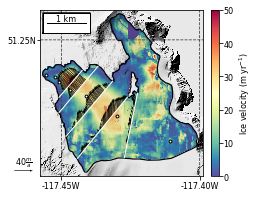

In [37]:
year=2017
I = np.abs(year - 2016) 

font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
thick=H_opt.copy();thick.data[thick.data<0.1] = np.nan
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

if VDIR == 'individual':
        vf_list = ['illecillewaet_2016_all25m_vx.tif','illecillewaet_2017_all25m_vx.tif','illecillewaet_2018_all25m_vx.tif']
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/' 
        VX = vdir+ vf_list[I]
        VY = vdir+ vf_list[I][:-7] + '_vy.tif' 
        ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'
else:
        vf = 'illecillewaet_all_dem3m_'
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'  
        VX = vdir + vf + 'blur1_25m_vx_neg.tif' #'vx_best_neg_5m.tif'
        VY = vdir + vf + 'blur1_25m_vy.tif'
#         VM = vdir + vf + 'vm_5m.tif'
        ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'
vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')   

vx.data[vx.data>0.01]= vx.data[vx.data>0.01]*-1.0 #=np.nan  ## vx for illec
vz = vy.copy(); vz.data = np.sqrt(vx.data**2 + vz.data**2 )
vz.data[extent.data!=1.0] = np.nan;vx.data[extent.data!=1.0] = np.nan;vy.data[extent.data!=1.0] = np.nan 
vz=xr.DataArray(vz.data, coords=vz.coords, name='vz')

VZA=xr.DataArray(data=vz, coords=vx.coords, dims=vx.dims, name='VZA', attrs=vx.attrs) #,indexes=vx.indexes fastpath=False)
# VZA.data=VZA.data*(msk)
# VZA.data[VZA.data>50.]=np.nan
fig, ax = plt.subplots(1,figsize=cm2inch(8.5,6.6))

grid = mercator_grid(center_ll=(-117.428, 51.238), extent=(4100, 4200)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
# grid = vx.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(add_ytick_labels=True, xinterval=0.05, yinterval=0.2, linewidths=0.75, linestyles='--', colors='0.25')
sm.set_scale_bar(location=(0.16, 0.92), add_bbox=True, bbox_dy=.98, bbox_kwargs=b, linewidth=1.0)

sm.set_data(VZA) 
sm.set_vmax(val=50.)
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, lw=0.75, linestyles='--', colors='0.25')
off_ice_V = np.nanmean(VZ_off_ice)
print(off_ice_V)
print(np.nanstd(VZ_off_ice))
sm.set_topography(topo,  relief_factor=0.9)
shpf14 = '/home/pelto/GIS/outlines/Illec2014.shp'  
gdf = salem.read_shapefile(shpf14)
sm.set_shapefile(gdf, lw=1.2, color='k',)
sm.set_cmap("Spectral_r")
sm.set_shapefile(gates, color='w', lw=1.1)
sm.append_colorbar(ax=ax, pad=0.1, label='Ice velocity (m yr$^{-1}$)') #'Ice Velocity (m yr$^-1$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
sm.plot(ax=ax)

obs_shp = '/home/pelto/Desktop/ice_flux/Flux_pts.csv'
obs_pts = pd.read_csv(obs_shp)  #salem.read_shapefile(obs_shp)
x, y = sm.grid.transform(obs_pts.lon.values, obs_pts.lat.values)
ax.scatter(x, y, color='k', s=8, facecolor='w',zorder=3)

u = D.vx.values
v = D.vy.values

X, Y = np.meshgrid(D.lon,D.lat)

# transform their coordinates to the map reference system and plot the arrows
xx, yy = sm.grid.transform(D.lon, D.lat, crs=salem.wgs84)#sm1.grid.proj

# xx, yy = np.meshgrid(xx,yy)

# qu = ax.quiver(xx, yy, u, v)

###### start:stop:step
n=1
Q = ax.quiver(xx[::n], yy[::n], u[::n], v[::n], scale=350)  #, pivot='mid')
qk = ax.quiverkey(Q, 0.07, 0.10, 40, r'$40 \frac{m}{a}$', labelpos='N', coordinates='figure', labelsep=0.025)

# sm.visualize(addcbar=True, cbar_title='Ice Velocity (m yr$^-1$)')
# plt.append_colorbar(ax, label='Velocity (m yr-1)')
fig.subplots_adjust(bottom=0.04, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_' +str(year) +'_vel_gates_quiver.pdf', dpi=300)
# plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_thickness.png', dpi=300)
plt.show()

3.2194884
2.9682283


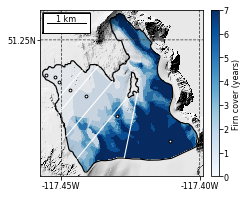

In [85]:
year=2017
I = np.abs(year - 2016) 

font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
thick=H_opt.copy();thick.data[thick.data<0.1] = np.nan
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

if VDIR == 'individual':
        vf_list = ['illecillewaet_2016_all25m_vx.tif','illecillewaet_2017_all25m_vx.tif','illecillewaet_2018_all25m_vx.tif']
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/' 
        VX = vdir+ vf_list[I]
        VY = vdir+ vf_list[I][:-7] + '_vy.tif' 
        ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'
else:
        vf = 'illecillewaet_all_dem3m_'
        vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/3m/'  
        VX = vdir + vf + 'blur1_25m_vx_neg.tif' #'vx_best_neg_5m.tif'
        VY = vdir + vf + 'blur1_25m_vy.tif'
#         VM = vdir + vf + 'vm_5m.tif'
        ITS = fl_path + 'ITS_LIVE/' + str(year) + '_illecillewaet_ITS_LIVE.tif'

vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx') 
    
firn = '/home/pelto/Desktop/ice_flux/Illecillewaet/AAR_Illec_2012_2018.tif'
firn =salem.open_xr_dataset(firn); firn_reproj = vx.salem.transform(firn);firn = firn_reproj.to_array(name='firn')
firn.data[extent.data!=1.0] = np.nan;

fig, ax = plt.subplots(1,figsize=cm2inch(8.5,6.6))

grid = mercator_grid(center_ll=(-117.428, 51.238), extent=(4100, 4200)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
# grid = vx.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(add_ytick_labels=True, xinterval=0.05, yinterval=0.2, linewidths=0.75, linestyles='--', colors='0.25')
sm.set_scale_bar(location=(0.16, 0.92), add_bbox=True, bbox_dy=.98, linewidth=1.0) #bbox_kwargs=b

sm.set_data(firn) 
# sm.set_vmax(val=50.)
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, lw=0.75, linestyles='--', colors='0.25')
off_ice_V = np.nanmean(VZ_off_ice)
print(off_ice_V)
print(np.nanstd(VZ_off_ice))
sm.set_topography(topo,  relief_factor=0.9)
shpf14 = '/home/pelto/GIS/outlines/Illec2014.shp'  
gdf = salem.read_shapefile(shpf14)
sm.set_shapefile(gdf, lw=1.2, color='k',)
sm.set_cmap("Blues")
sm.set_shapefile(gates, color='w', lw=1.1)
sm.append_colorbar(ax=ax, pad=0.1, label='Firn cover (years)') #'Ice Velocity (m yr$^-1$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
sm.plot(ax=ax)

obs_shp = '/home/pelto/Desktop/ice_flux/Flux_pts.csv'
obs_pts = pd.read_csv(obs_shp)  #salem.read_shapefile(obs_shp)
x, y = sm.grid.transform(obs_pts.lon.values, obs_pts.lat.values)
ax.scatter(x, y, color='k', s=8, facecolor='w',zorder=3)

fig.subplots_adjust(bottom=0.04, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+ glacier[gl] +'_firn_map.pdf', dpi=300)
# plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_thickness.png', dpi=300)
plt.show()

In [ ]:
## trying to fill nan velocity points
#     import more_itertools as mit
#     #IDS= unique(D.id)

# import more_itertools as mit
# IDS= unique(D.id)

# Sorted_D= D.sort_values(['id', 'distance'], ascending=[True,True])
# Missing_V= np.where(Sorted_D['vz'].isnull()==True)[0]
# Grouped_MV= [list(group) for group in mit.consecutive_groups(Missing_V)]
# for i in Grouped_MV:
#     if len(i)==1:
#         index=i[0]
#         replace= np.mean([Sorted_D['vz'][index-1],Sorted_D['vz'][index+1]])
#         Sorted_D['vz'][index]= replace
#     else:
#         start_index=i[0]
#         end_index=i[-1]
#         replace= np.mean([Sorted_D['vz'][start_index-4:start_index-1],Sorted_D['vz'][end_index+1:end_index+4]])
#         Sorted_D['vx'][i]=replace
    

In [19]:
obs = pd.read_csv(fl_path+ 'Illecillewaet_bdot.csv')
b=obs[(obs.Elev>2400)&(obs.Elev<2475)&(obs.Ba>-0.1)]
b.Ba.median()

0.322

In [115]:
####### Net flux uncertainty #################

### average ice velcoity uncertainty
vel=[sVZ/18.7,sVZ/13.3,sVZ/5.0,sVZ/8.0,sVZ/8.1]
np.mean(vel),np.min(vel),np.max(vel),

# print(np.mean(sVZ/new.v_gate_mean[1:]*100))
# print((sHopt*new.HF[1:])/new.HF[1:]*100)
n=[new16,new17,new]; sQ=[];sQF=[];sB=[] ;sQI=[];sBF=[];sBI=[]
for i in range(len(n)):
    sQ.append(np.sum(n[i].sQout)/np.sum(n[i].Q_out))
    sQF.append(np.sum(n[i].sQoutF)/np.sum(n[i].Q_outF))
    sQI.append(np.sum(n[i].sQo_gpr)/np.sum(n[i].Qo_gpr))
    
    sBF.append(np.sum(n[i].sBwe_F*n[i].dem_count)/np.sum(n[i].dem_count))
    sB.append(np.sum(n[i].sBwe_opt*n[i].dem_count)/np.sum(n[i].dem_count))
    sBI.append(np.sum(n[i].sBwe_gpr*n[i].dem_count)/np.sum(n[i].dem_count))
print(np.mean(sQ))
print(np.nanmean(sQF))
print(np.nanmean(sQI))
print(np.nanmean([sQI,sQ,sQI]).round(3))
print(np.nanmean([sBI,sB,sBF]).round(3))

0.2544915018837891
0.23775426112957673
0.23280580382612634
0.24
0.589
